In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline

In [ ]:
EnergyDF = pd.read_csv('/content/energy_dataset.csv')

In [ ]:
display(EnergyDF.head())

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [ ]:
WeatherDF = pd.read_csv('/content/weather_features.csv')

In [ ]:
display(WeatherDF.head())

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


Preprocessing

In [ ]:
# Renaming Weather column dt_iso to time for merging
WeatherDF = WeatherDF.rename(columns={'dt_iso': 'time'})

In [ ]:
# Merging both tables based on the time column
dfinal = EnergyDF.merge(WeatherDF, on="time", how = 'inner')

In [ ]:
dfinal.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1,309,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,0,226,0.0,0.0,0.0,0,800,clear,sky is clear,01
3,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,7,58,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1,21,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [ ]:
dfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178396 entries, 0 to 178395
Data columns (total 45 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   time                                         178396 non-null  object 
 1   generation biomass                           178301 non-null  float64
 2   generation fossil brown coal/lignite         178306 non-null  float64
 3   generation fossil coal-derived gas           178306 non-null  float64
 4   generation fossil gas                        178306 non-null  float64
 5   generation fossil hard coal                  178306 non-null  float64
 6   generation fossil oil                        178301 non-null  float64
 7   generation fossil oil shale                  178306 non-null  float64
 8   generation fossil peat                       178306 non-null  float64
 9   generation geothermal                        178306 non-nul

In [ ]:
#dropping null columns

dfinal = dfinal.drop('generation hydro pumped storage aggregated', axis=1)
dfinal = dfinal.drop('forecast wind offshore eday ahead', axis=1)
dfinal = dfinal.drop('generation fossil coal-derived gas', axis=1)
dfinal = dfinal.drop('generation fossil oil shale', axis=1)
dfinal = dfinal.drop('generation fossil peat', axis=1)
dfinal = dfinal.drop('generation geothermal', axis=1)
dfinal = dfinal.drop('generation marine', axis=1)

dfinal['generation wind'] = dfinal['generation wind offshore']+ dfinal['generation wind onshore']
dfinal = dfinal.drop('generation wind offshore', axis=1)
dfinal = dfinal.drop('generation wind onshore', axis=1)

In [ ]:
dfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178396 entries, 0 to 178395
Data columns (total 37 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   time                                         178396 non-null  object 
 1   generation biomass                           178301 non-null  float64
 2   generation fossil brown coal/lignite         178306 non-null  float64
 3   generation fossil gas                        178306 non-null  float64
 4   generation fossil hard coal                  178306 non-null  float64
 5   generation fossil oil                        178301 non-null  float64
 6   generation hydro pumped storage consumption  178301 non-null  float64
 7   generation hydro run-of-river and poundage   178301 non-null  float64
 8   generation hydro water reservoir             178306 non-null  float64
 9   generation nuclear                           178311 non-nul

In [ ]:
dfinal.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,generation wind
count,178301.000000,178306.000000,178306.000000,178306.000000,178301.000000,178301.000000,178301.000000,178306.000000,178311.000000,178306.000000,...,1.783960e+05,178396.000000,178396.00000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178306.000000
mean,382.999002,448.256890,5626.254428,4254.162345,298.149651,475.121143,972.937364,2606.765852,6263.549316,60.160606,...,1.069261e+03,68.423457,2.47056,166.591190,0.075492,0.000380,0.004763,25.073292,759.831902,5471.050963
std,85.256652,354.297585,2203.888156,1960.883415,52.464334,792.399286,400.974209,1835.930904,839.973970,20.212231,...,5.969632e+03,21.902888,2.09591,116.611927,0.398847,0.007288,0.222604,30.774129,108.733223,3215.408881
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000,0.000000
25%,333.000000,0.000000,4127.000000,2526.000000,263.000000,0.000000,638.000000,1079.000000,5757.000000,53.000000,...,1.013000e+03,53.000000,1.00000,55.000000,0.000000,0.000000,0.000000,0.000000,800.000000,2940.000000
50%,366.000000,509.000000,4972.000000,4473.000000,300.000000,67.000000,907.000000,2166.000000,6563.000000,57.000000,...,1.018000e+03,72.000000,2.00000,177.000000,0.000000,0.000000,0.000000,20.000000,800.000000,4856.000000
75%,430.000000,757.000000,6435.000000,5836.000000,330.000000,615.000000,1251.000000,3759.000000,7025.000000,80.000000,...,1.022000e+03,87.000000,4.00000,270.000000,0.000000,0.000000,0.000000,40.000000,801.000000,7407.000000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,...,1.008371e+06,100.000000,133.00000,360.000000,12.000000,2.315000,21.500000,100.000000,804.000000,17436.000000


In [ ]:
print("cols:",dfinal.columns.to_list())

cols: ['time', 'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation nuclear', 'generation other', 'generation other renewable', 'generation solar', 'generation waste', 'forecast solar day ahead', 'forecast wind onshore day ahead', 'total load forecast', 'total load actual', 'price day ahead', 'price actual', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all', 'weather_id', 'weather_main', 'weather_description', 'weather_icon', 'generation wind']


In [ ]:
print("Dimension ->",dfinal.shape,"\n")
dfinal.isnull().sum()

Dimension -> (178396, 37) 



time                                             0
generation biomass                              95
generation fossil brown coal/lignite            90
generation fossil gas                           90
generation fossil hard coal                     90
generation fossil oil                           95
generation hydro pumped storage consumption     95
generation hydro run-of-river and poundage      95
generation hydro water reservoir                90
generation nuclear                              85
generation other                                90
generation other renewable                      90
generation solar                                90
generation waste                                95
forecast solar day ahead                         0
forecast wind onshore day ahead                  0
total load forecast                              0
total load actual                              180
price day ahead                                  0
price actual                   

In [ ]:
dfinal.fillna(dfinal.median(), inplace=True)

<ipython-input-15-4e05a863c4da>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfinal.fillna(dfinal.median(), inplace=True)


In [ ]:
dfinal.isnull().sum()

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
forecast solar day ahead                       0
forecast wind onshore day ahead                0
total load forecast                            0
total load actual                              0
price day ahead                                0
price actual                                   0
city_name           

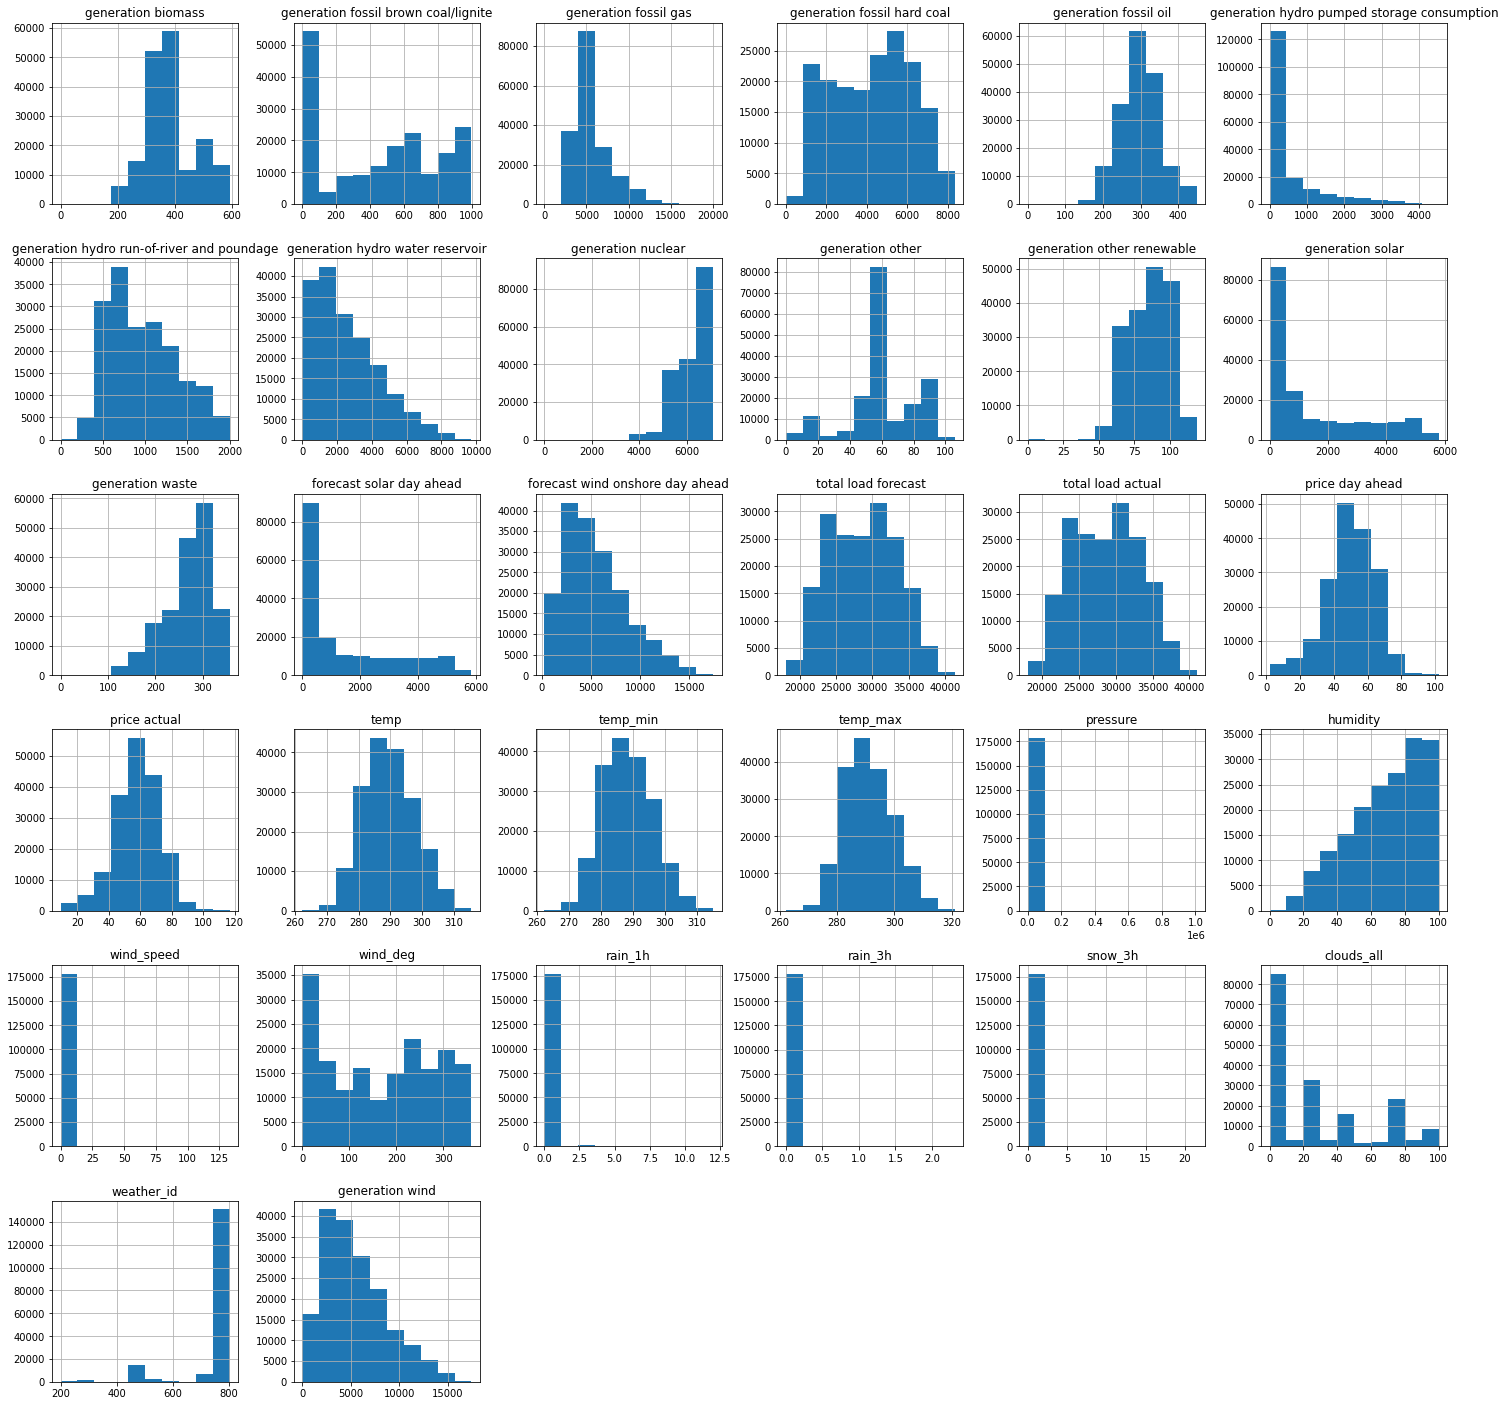

In [ ]:
dfinal.hist(figsize=(25,25))
plt.show()

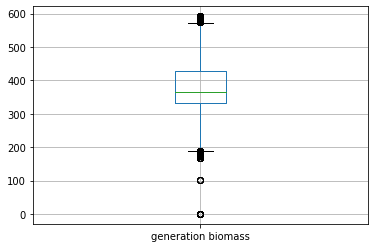

In [ ]:
dfinal.boxplot(column='generation biomass')
plt.show()

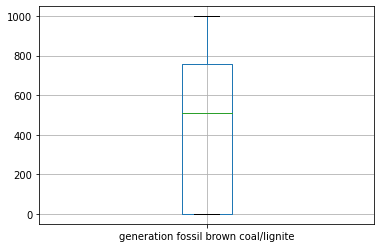

In [ ]:
dfinal.boxplot(column='generation fossil brown coal/lignite')
plt.show()

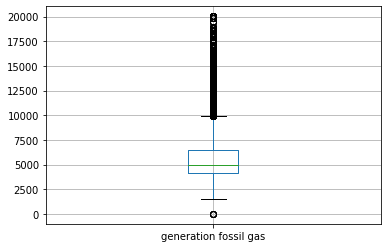

In [ ]:
dfinal.boxplot(column='generation fossil gas')
plt.show()

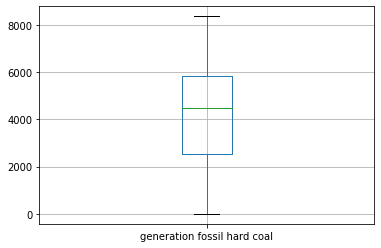

In [ ]:
dfinal.boxplot(column='generation fossil hard coal')
plt.show()

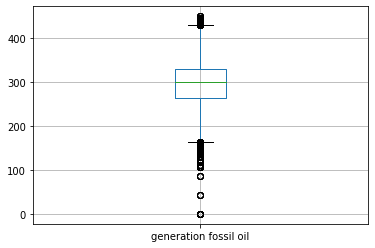

In [ ]:
dfinal.boxplot(column='generation fossil oil')
plt.show()

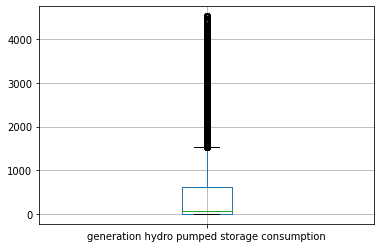

In [ ]:
dfinal.boxplot(column='generation hydro pumped storage consumption')
plt.show()

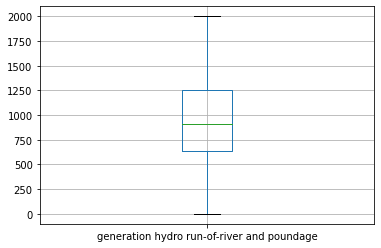

In [ ]:
dfinal.boxplot(column='generation hydro run-of-river and poundage')
plt.show()

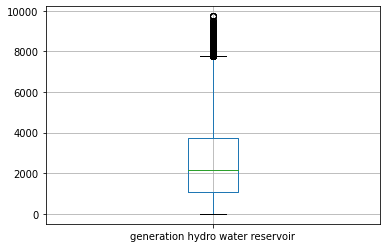

In [ ]:
dfinal.boxplot(column='generation hydro water reservoir')
plt.show()

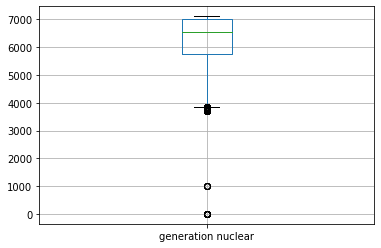

In [ ]:
dfinal.boxplot(column='generation nuclear')
plt.show()

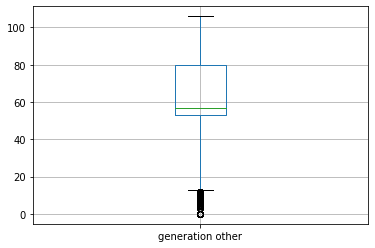

In [ ]:
dfinal.boxplot(column='generation other')
plt.show()

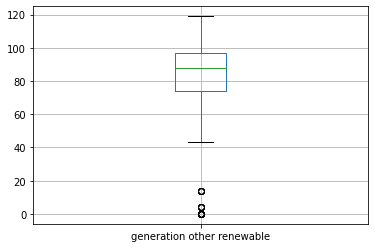

In [ ]:
dfinal.boxplot(column='generation other renewable')
plt.show()

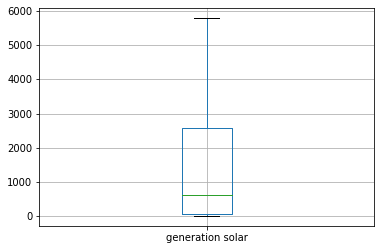

In [ ]:
dfinal.boxplot(column='generation solar')
plt.show()

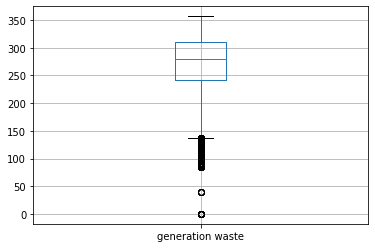

In [ ]:
dfinal.boxplot(column='generation waste')
plt.show()

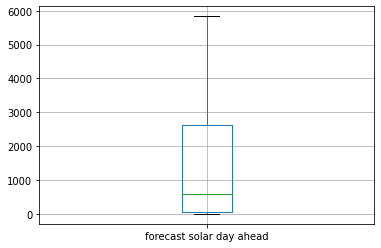

In [ ]:
dfinal.boxplot(column='forecast solar day ahead')
plt.show()

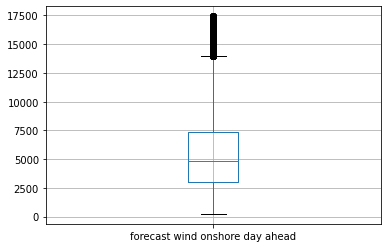

In [ ]:
dfinal.boxplot(column='forecast wind onshore day ahead')
plt.show()

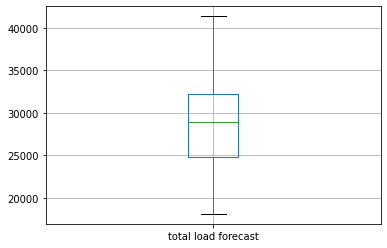

In [ ]:
dfinal.boxplot(column='total load forecast')
plt.show()

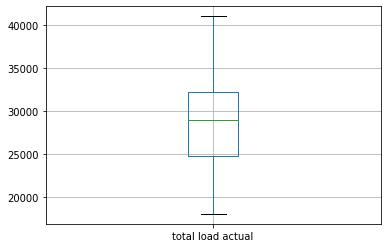

In [ ]:
dfinal.boxplot(column='total load actual')
plt.show()

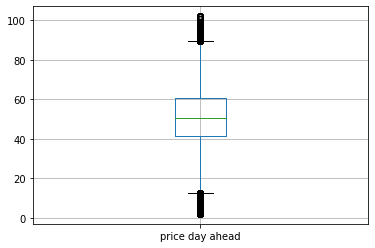

In [ ]:
dfinal.boxplot(column='price day ahead')
plt.show()

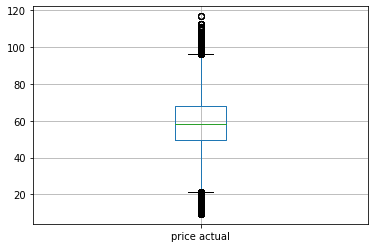

In [ ]:
dfinal.boxplot(column='price actual')
plt.show()

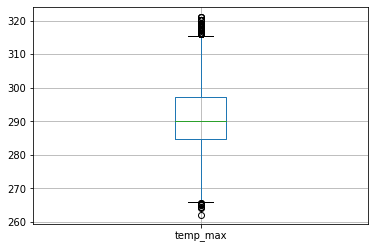

In [ ]:
dfinal.boxplot(column='temp_max')
plt.show()

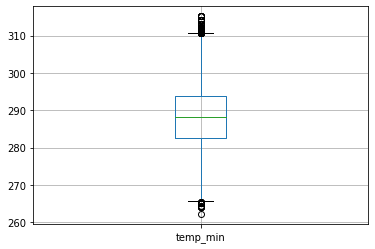

In [ ]:
dfinal.boxplot(column='temp_min')
plt.show()

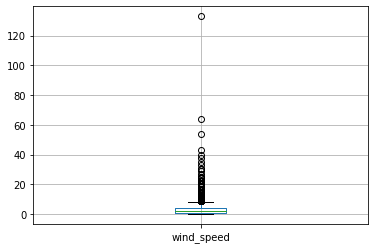

In [ ]:
dfinal.boxplot(column='wind_speed')
plt.show()

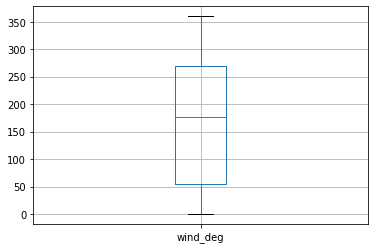

In [ ]:
dfinal.boxplot(column='wind_deg')
plt.show()

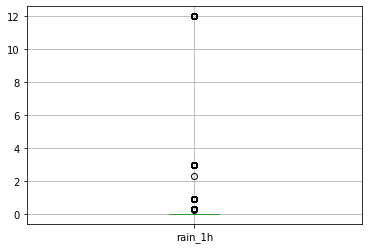

In [ ]:
dfinal.boxplot(column='rain_1h')
plt.show()

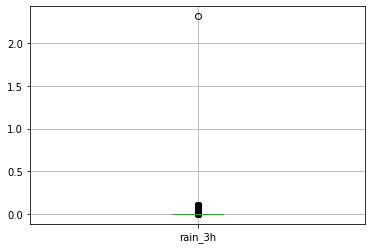

In [ ]:
dfinal.boxplot(column='rain_3h')
plt.show()

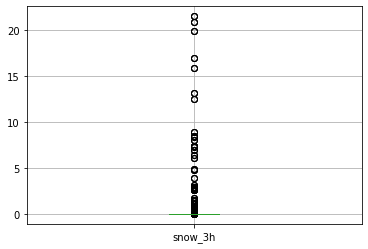

In [ ]:
dfinal.boxplot(column='snow_3h')
plt.show()

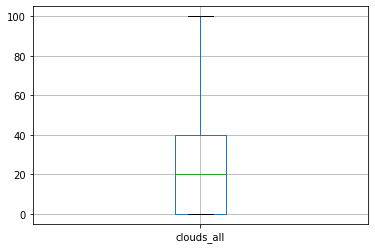

In [ ]:
dfinal.boxplot(column='clouds_all')
plt.show()

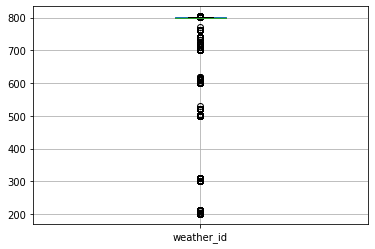

In [ ]:
dfinal.boxplot(column='weather_id')
plt.show()

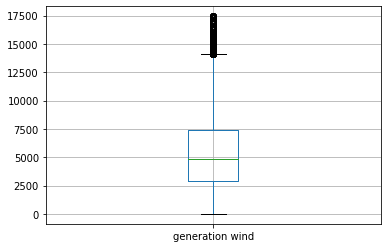

In [ ]:
dfinal.boxplot(column='generation wind')
plt.show()

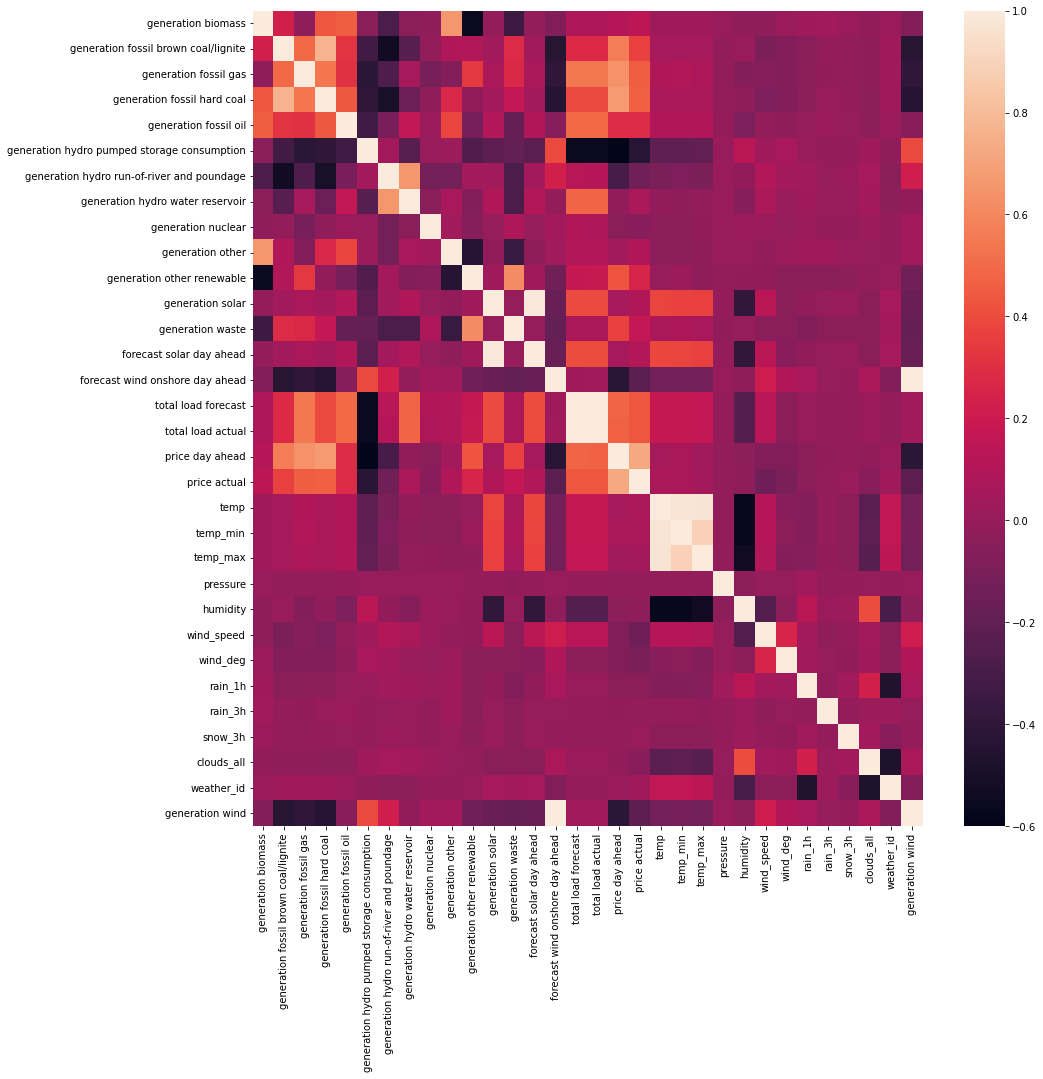

In [ ]:
#Pearson Correlation
corr = dfinal.corr(method='pearson')
plt.figure(figsize =(15, 15))
sns.heatmap(corr)
plt.show()

In [ ]:
dfinal.corr(method='pearson')

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,generation wind
generation biomass,1.000000,0.230846,-0.020286,0.433587,0.458519,-0.045354,-0.286046,-0.034868,-0.020536,0.657726,...,0.006567,-0.022951,-0.022618,0.016169,0.025404,0.038226,0.014050,-0.016394,0.014305,-0.071432
generation fossil brown coal/lignite,0.230846,1.000000,0.498962,0.767983,0.312718,-0.323135,-0.525344,-0.229698,-0.009618,0.098438,...,-0.009407,0.009217,-0.096163,-0.072445,-0.044535,-0.002912,-0.006841,-0.022883,0.029483,-0.433787
generation fossil gas,-0.020286,0.498962,1.000000,0.542715,0.310423,-0.420418,-0.271073,0.061760,-0.113375,-0.063995,...,-0.007172,-0.067059,-0.058522,-0.073654,-0.035891,-0.016527,-0.009961,-0.024945,0.026505,-0.396011
generation fossil hard coal,0.433587,0.767983,0.542715,1.000000,0.439777,-0.405885,-0.498130,-0.157529,-0.024535,0.264580,...,-0.009352,-0.022834,-0.088653,-0.064541,-0.026676,0.009500,-0.002293,-0.029169,0.030189,-0.441012
generation fossil oil,0.458519,0.312718,0.310423,0.439777,1.000000,-0.330522,-0.106315,0.161285,0.017006,0.375319,...,-0.002862,-0.093299,-0.010799,-0.020345,0.004392,0.018492,0.001296,-0.026252,0.018639,-0.052029
generation hydro pumped storage consumption,-0.045354,-0.323135,-0.420418,-0.405885,-0.330522,1.000000,0.052852,-0.234642,0.012258,0.020223,...,0.008047,0.135484,0.029487,0.067163,0.007101,-0.001001,-0.006046,0.031267,-0.019788,0.387965
generation hydro run-of-river and poundage,-0.286046,-0.525344,-0.271073,-0.498130,-0.106315,0.052852,1.000000,0.652659,-0.125026,-0.128154,...,0.006283,-0.015630,0.103545,0.053252,0.039111,0.003960,0.015148,0.058475,-0.047299,0.223494
generation hydro water reservoir,-0.034868,-0.229698,0.061760,-0.157529,0.161285,-0.234642,0.652659,1.000000,-0.049559,0.063955,...,0.009788,-0.059735,0.070797,0.011586,0.036385,0.010571,0.009968,0.046756,-0.030712,-0.018301
generation nuclear,-0.020536,-0.009618,-0.113375,-0.024535,0.017006,0.012258,-0.125026,-0.049559,1.000000,0.041173,...,0.009014,0.013176,0.013890,0.003451,0.021606,-0.003762,-0.005754,0.020171,-0.005222,0.050286
generation other,0.657726,0.098438,-0.063995,0.264580,0.375319,0.020223,-0.128154,0.063955,0.041173,1.000000,...,0.010093,0.009424,-0.010483,0.019215,0.025902,0.029514,0.007495,0.004038,-0.002039,0.045968


In [ ]:
dfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178396 entries, 0 to 178395
Data columns (total 37 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   time                                         178396 non-null  object 
 1   generation biomass                           178396 non-null  float64
 2   generation fossil brown coal/lignite         178396 non-null  float64
 3   generation fossil gas                        178396 non-null  float64
 4   generation fossil hard coal                  178396 non-null  float64
 5   generation fossil oil                        178396 non-null  float64
 6   generation hydro pumped storage consumption  178396 non-null  float64
 7   generation hydro run-of-river and poundage   178396 non-null  float64
 8   generation hydro water reservoir             178396 non-null  float64
 9   generation nuclear                           178396 non-nul

In [ ]:
dfinal.describe().T

,count,mean,std,min,25%,50%,75%,max
generation biomass,178396.0,382.989949,85.234850,0.00,333.000000,366.00,429.000000,592.000
generation fossil brown coal/lignite,178396.0,448.287534,354.210828,0.00,0.000000,509.00,756.000000,999.000
generation fossil gas,178396.0,5625.924359,2203.381137,0.00,4127.000000,4972.00,6434.000000,20034.000
generation fossil hard coal,178396.0,4254.272747,1960.394880,0.00,2527.000000,4473.00,5835.000000,8359.000
generation fossil oil,178396.0,298.150637,52.450380,0.00,263.000000,300.00,329.000000,449.000
generation hydro pumped storage consumption,178396.0,474.903810,792.244223,0.00,0.000000,67.00,615.000000,4523.000
generation hydro run-of-river and poundage,178396.0,972.902251,400.870317,0.00,638.000000,907.00,1251.000000,2000.000
generation hydro water reservoir,178396.0,2606.543488,1835.494419,0.00,1079.000000,2166.00,3758.000000,9728.000
generation nuclear,178396.0,6263.691994,839.799261,0.00,5758.000000,6563.00,7025.000000,7117.000
generation other,178396.0,60.159011,20.207256,0.00,53.000000,57.00,80.000000,106.000


In [ ]:
dfinal["city_name"].unique()

array(['Valencia', 'Madrid', 'Bilbao', ' Barcelona', 'Seville'],
      dtype=object)

In [ ]:
dfinal["weather_main"].unique()

array(['clear', 'clouds', 'rain', 'snow', 'fog', 'mist', 'haze', 'dust',
       'drizzle', 'thunderstorm', 'smoke', 'squall'], dtype=object)

In [ ]:
dfinal["weather_description"].unique()

array(['sky is clear', 'few clouds', 'scattered clouds', 'broken clouds',
       'light rain', 'overcast clouds', 'moderate rain',
       'heavy intensity rain', 'very heavy rain', 'light snow',
       'heavy snow', 'fog', 'mist', 'haze', 'dust', 'drizzle',
       'thunderstorm', 'proximity shower rain',
       'light intensity shower rain', 'heavy intensity shower rain',
       'shower rain', 'proximity thunderstorm',
       'thunderstorm with heavy rain', 'thunderstorm with rain',
       'thunderstorm with light rain', 'light intensity drizzle',
       'rain and drizzle', 'light intensity drizzle rain', 'smoke',
       'light rain and snow', 'rain and snow', 'snow', 'shower sleet',
       'light shower sleet', 'sleet', 'light shower snow',
       'heavy intensity drizzle', 'sand dust whirls',
       'proximity moderate rain', 'light thunderstorm',
       'proximity drizzle', 'ragged shower rain', 'squalls'], dtype=object)

In [ ]:
dfinal["weather_icon"].unique()

array(['01n', '01', '01d', '02', '03n', '02n', '03', '04n', '04', '10',
       '02d', '04d', '03d', '10d', '10n', '13', '13d', '50n', '50d',
       '09n', '11d', '09d', '11n', '13n'], dtype=object)

In [ ]:

dfinal["weather_id"].unique()

array([800, 801, 802, 803, 500, 804, 501, 502, 503, 600, 602, 741, 701,
       721, 761, 301, 211, 521, 520, 522, 202, 201, 200, 300, 311, 310,
       711, 615, 616, 601, 612, 611, 620, 302, 731, 210, 531, 771])

In [ ]:
dfinal = dfinal.drop(['weather_main', 'weather_description', 'weather_icon'], axis=1)

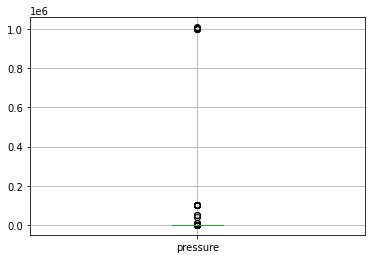

In [ ]:
dfinal.boxplot(column='pressure')
plt.show()

In [ ]:
dfinal.loc[dfinal.pressure > 1051, 'pressure'] = np.nan
dfinal.loc[dfinal.pressure < 931, 'pressure'] = np.nan

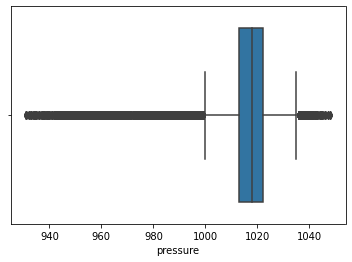

In [ ]:
sns.boxplot(x=dfinal['pressure'])
plt.show()

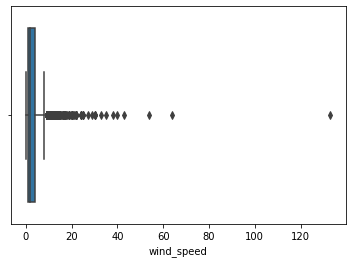

In [ ]:
sns.boxplot(x=dfinal['wind_speed'])
plt.show()

In [ ]:
dfinal.loc[dfinal.wind_speed > 50, 'wind_speed'] = np.nan

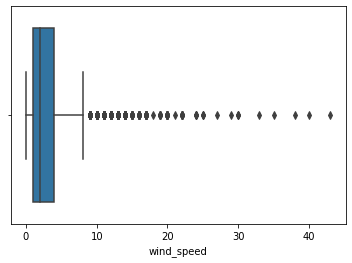

In [ ]:
sns.boxplot(x=dfinal['wind_speed'])
plt.show()

In [ ]:
dfinal.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

In [ ]:
def plot_series(df=None, column=None, series=pd.Series([]),
                label=None, ylabel=None, title=None, start=0, end=None):
    sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('Time', fontsize=16)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax

<ipython-input-64-3c2a47eaf940>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def plot_series(df=None, column=None, series=pd.Series([]),


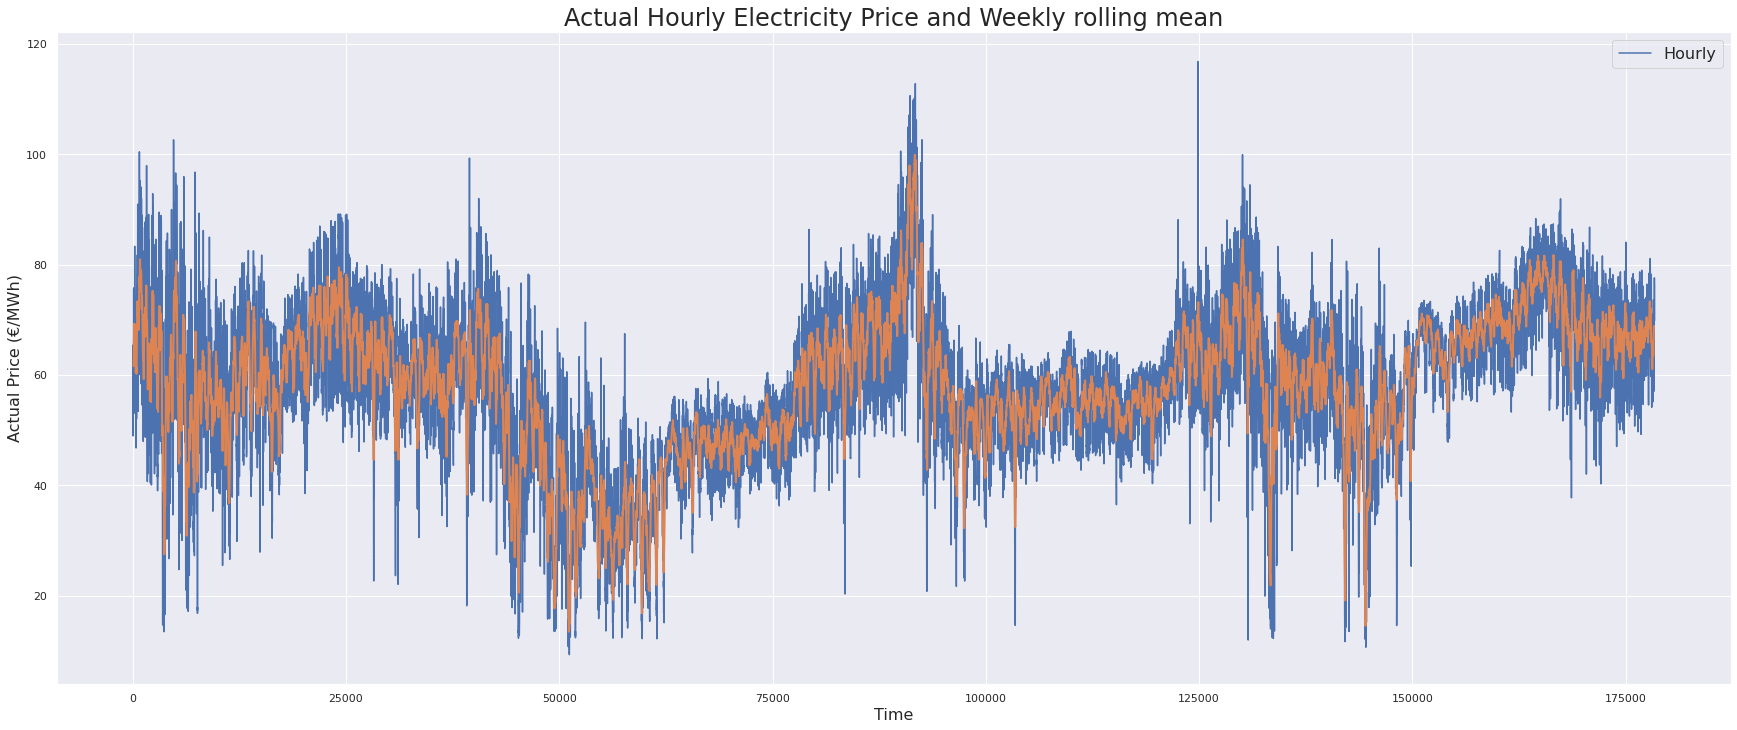

In [ ]:
rolling = dfinal['price actual'].rolling(24*7, center=True).mean()
ax = plot_series(dfinal, 'price actual', label='Hourly', ylabel='Actual Price (€/MWh)',
                 title='Actual Hourly Electricity Price and Weekly rolling mean')
ax.plot(rolling, linestyle='-', linewidth=2, label='Weekly rolling mean')
plt.show()

In [ ]:
highly_correlated = abs(dfinal.corr()[dfinal.corr() > 0.75])
print(highly_correlated[highly_correlated < 1.0].stack().to_string())

generation fossil brown coal/lignite  generation fossil hard coal             0.767983
generation fossil hard coal           generation fossil brown coal/lignite    0.767983
generation solar                      forecast solar day ahead                0.992814
forecast solar day ahead              generation solar                        0.992814
forecast wind onshore day ahead       generation wind                         0.994134
total load forecast                   total load actual                       0.994434
total load actual                     total load forecast                     0.994434
temp                                  temp_min                                0.974541
                                      temp_max                                0.966853
temp_min                              temp                                    0.974541
                                      temp_max                                0.892425
temp_max                              temp 

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
dfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178396 entries, 0 to 178395
Data columns (total 34 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   time                                         178396 non-null  object 
 1   generation biomass                           178396 non-null  float64
 2   generation fossil brown coal/lignite         178396 non-null  float64
 3   generation fossil gas                        178396 non-null  float64
 4   generation fossil hard coal                  178396 non-null  float64
 5   generation fossil oil                        178396 non-null  float64
 6   generation hydro pumped storage consumption  178396 non-null  float64
 7   generation hydro run-of-river and poundage   178396 non-null  float64
 8   generation hydro water reservoir             178396 non-null  float64
 9   generation nuclear                           178396 non-nul

In [ ]:
dfinal = dfinal.rename(columns={'price actual': 'price_actual', 'price day ahead': 'price_day_ahead','total load actual':'total_load_actual'})

In [ ]:
dfinal['temp_C'] = round((dfinal['temp']-273.15),1)

In [ ]:
dfinal['time'] =  pd.to_datetime(dfinal['time'],utc=True)

In [ ]:
model = ols('price_actual ~ price_day_ahead', data=dfinal).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           price_actual   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                 2.043e+05
Date:                Sat, 24 Dec 2022   Prob (F-statistic):               0.00
Time:                        02:10:48   Log-Likelihood:            -6.5851e+05
No. Observations:              178396   AIC:                         1.317e+06
Df Residuals:                  178394   BIC:                         1.317e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          22.4857      0.082    2

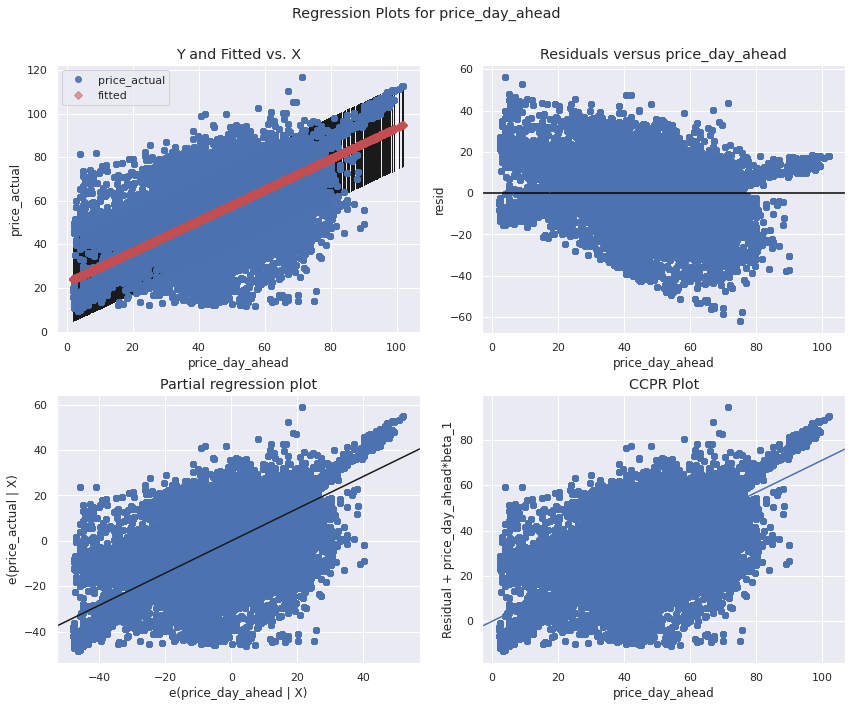

In [ ]:
fig = plt.figure(figsize=(12,10))
fig = sm.graphics.plot_regress_exog(model, 'price_day_ahead', fig=fig)

In [ ]:
model = ols('price_actual ~ total_load_actual', data=dfinal).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           price_actual   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                 4.179e+04
Date:                Sat, 24 Dec 2022   Prob (F-statistic):               0.00
Time:                        02:10:56   Log-Likelihood:            -7.0781e+05
No. Observations:              178396   AIC:                         1.416e+06
Df Residuals:                  178394   BIC:                         1.416e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            19.0919      0.19

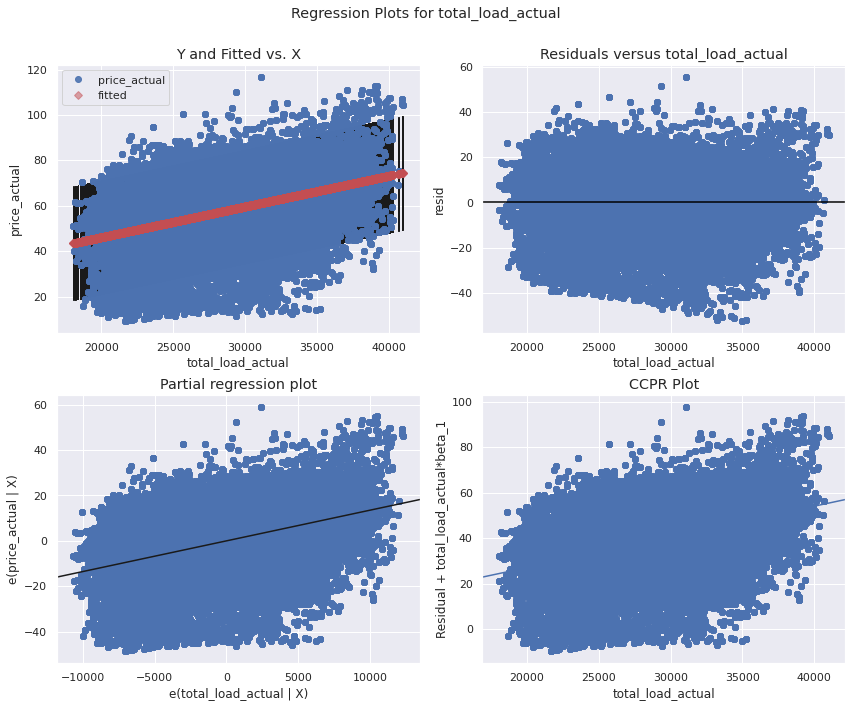

In [ ]:
fig = plt.figure(figsize=(12,10))
fig = sm.graphics.plot_regress_exog(model, 'total_load_actual', fig=fig)

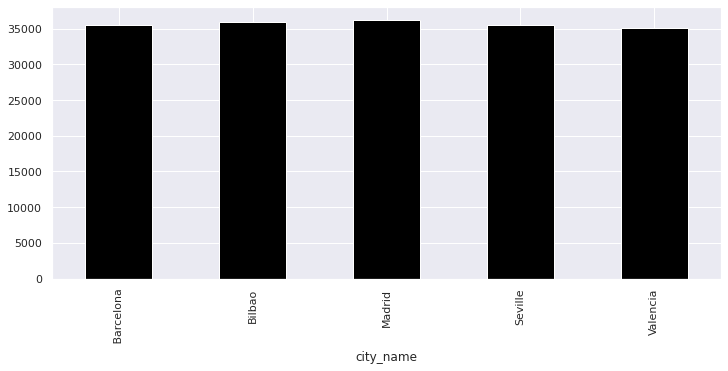

In [ ]:
dfinal.groupby(["city_name"])[['temp']].count().plot.bar(color="black", legend=False, figsize=(12,5))

In [ ]:
dfinal.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,generation wind,temp_C
0,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,77,1.0,62,0.0,0.0,0.0,0,800,6378.0,-2.7
1,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,63,1.0,309,0.0,0.0,0.0,0,800,6378.0,-5.8
2,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,97,0.0,226,0.0,0.0,0.0,0,800,6378.0,-3.5
3,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,100,7.0,58,0.0,0.0,0.0,0,800,6378.0,8.5
4,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,75,1.0,21,0.0,0.0,0.0,0,800,6378.0,0.2


In [ ]:
Valencia_df = dfinal[dfinal['city_name'] == 'Valencia']
Madrid_df = dfinal[dfinal['city_name'] == 'Madrid']
Bilbao_df = dfinal[dfinal['city_name'] == 'Bilbao']
Barcelona_df = dfinal[dfinal['city_name'] == ' Barcelona']
Seville_df = dfinal[dfinal['city_name'] == 'Seville']

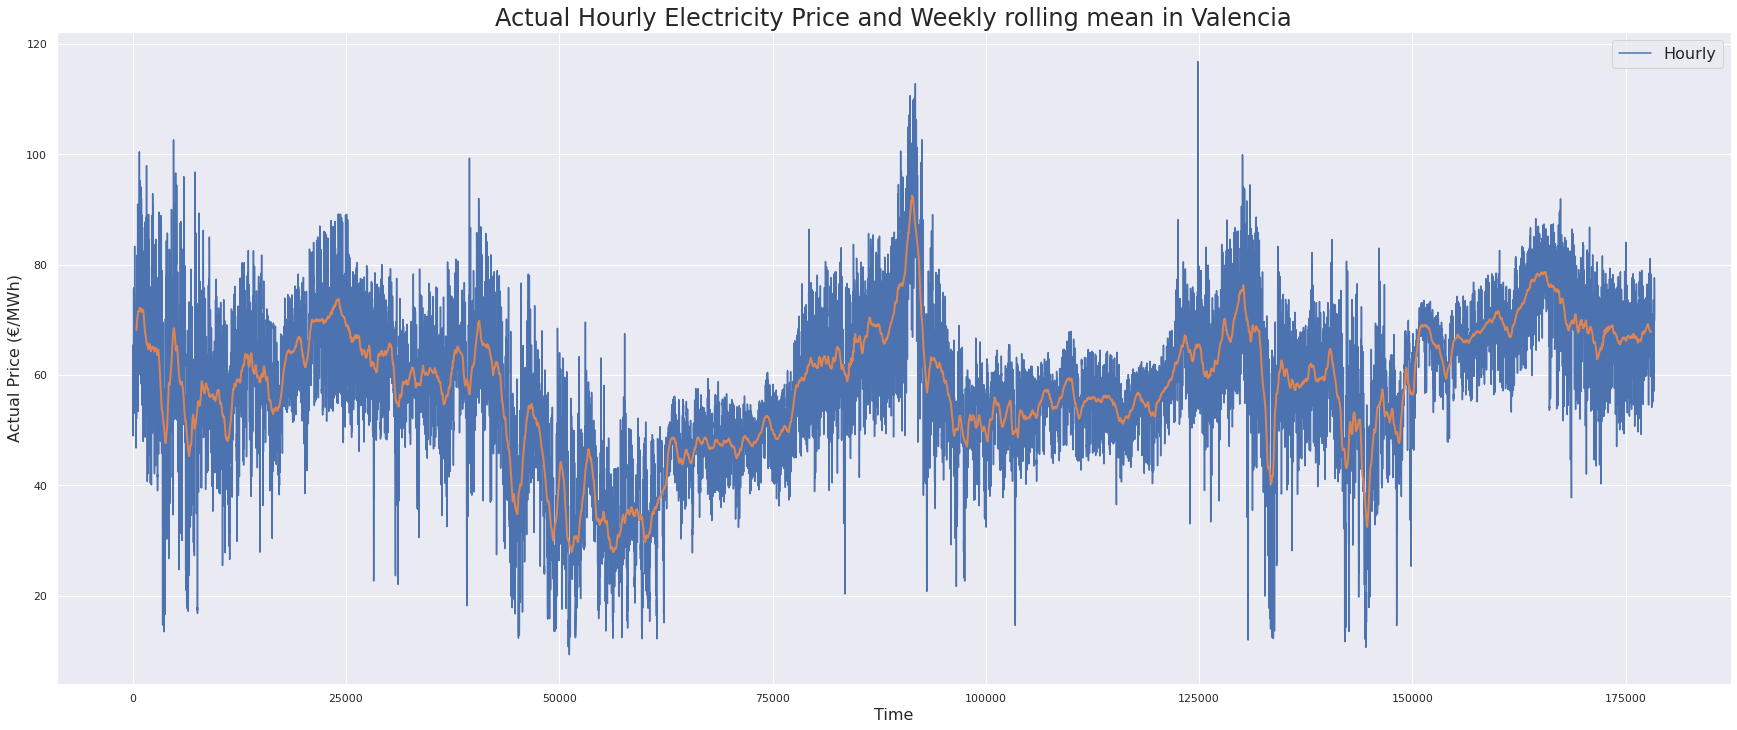

In [ ]:
rolling = Valencia_df['price_actual'].rolling(24*7, center=True).mean()
ax = plot_series(Valencia_df, 'price_actual', label='Hourly', ylabel='Actual Price (€/MWh)',
                 title='Actual Hourly Electricity Price and Weekly rolling mean in Valencia')
ax.plot(rolling, linestyle='-', linewidth=2, label='Weekly rolling mean')
plt.show()

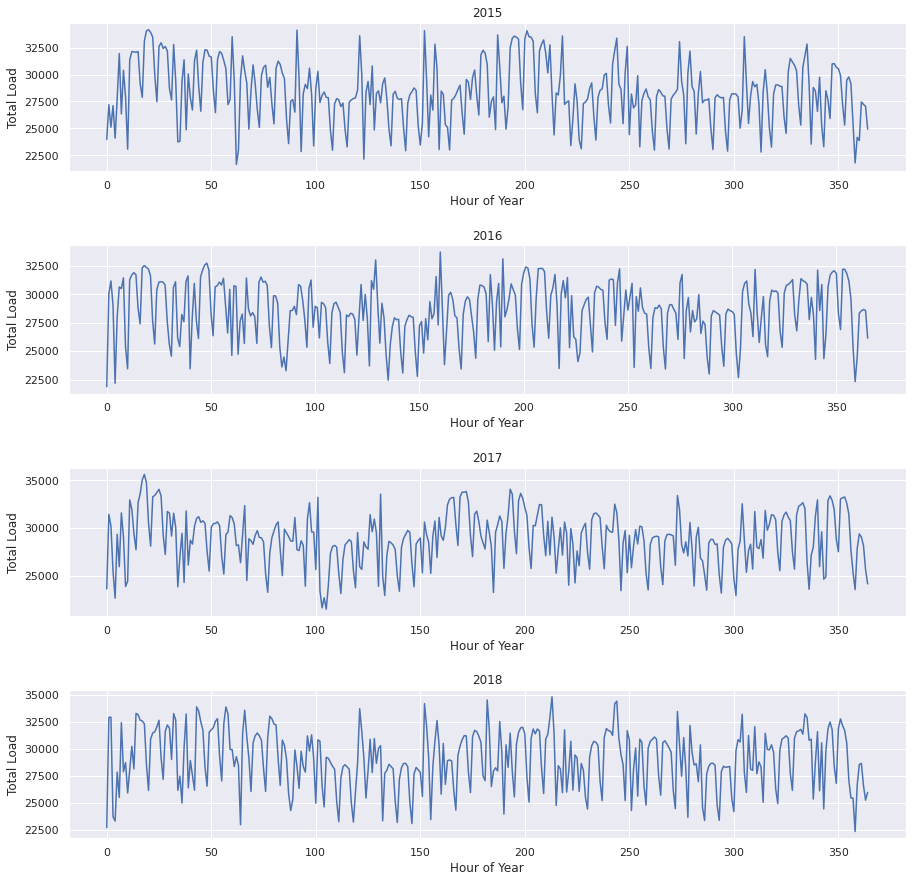

In [ ]:
V_df = Valencia_df.resample('D', on='time').mean()
V_df = V_df['2015':'2018']
groups = V_df['total_load_actual'].groupby(pd.Grouper(freq='A'))

#set figure and axis
fig, axs = plt.subplots(len(groups), 1, figsize=(15,15))


for ax, (name, group) in zip(axs, groups):

    #plot the data
    ax.plot(pd.Series(group.values))

    ax.set_xlabel('Hour of Year')
    ax.set_ylabel('Total Load')
    ax.set_title(name.year)
    plt.subplots_adjust(hspace=0.5)

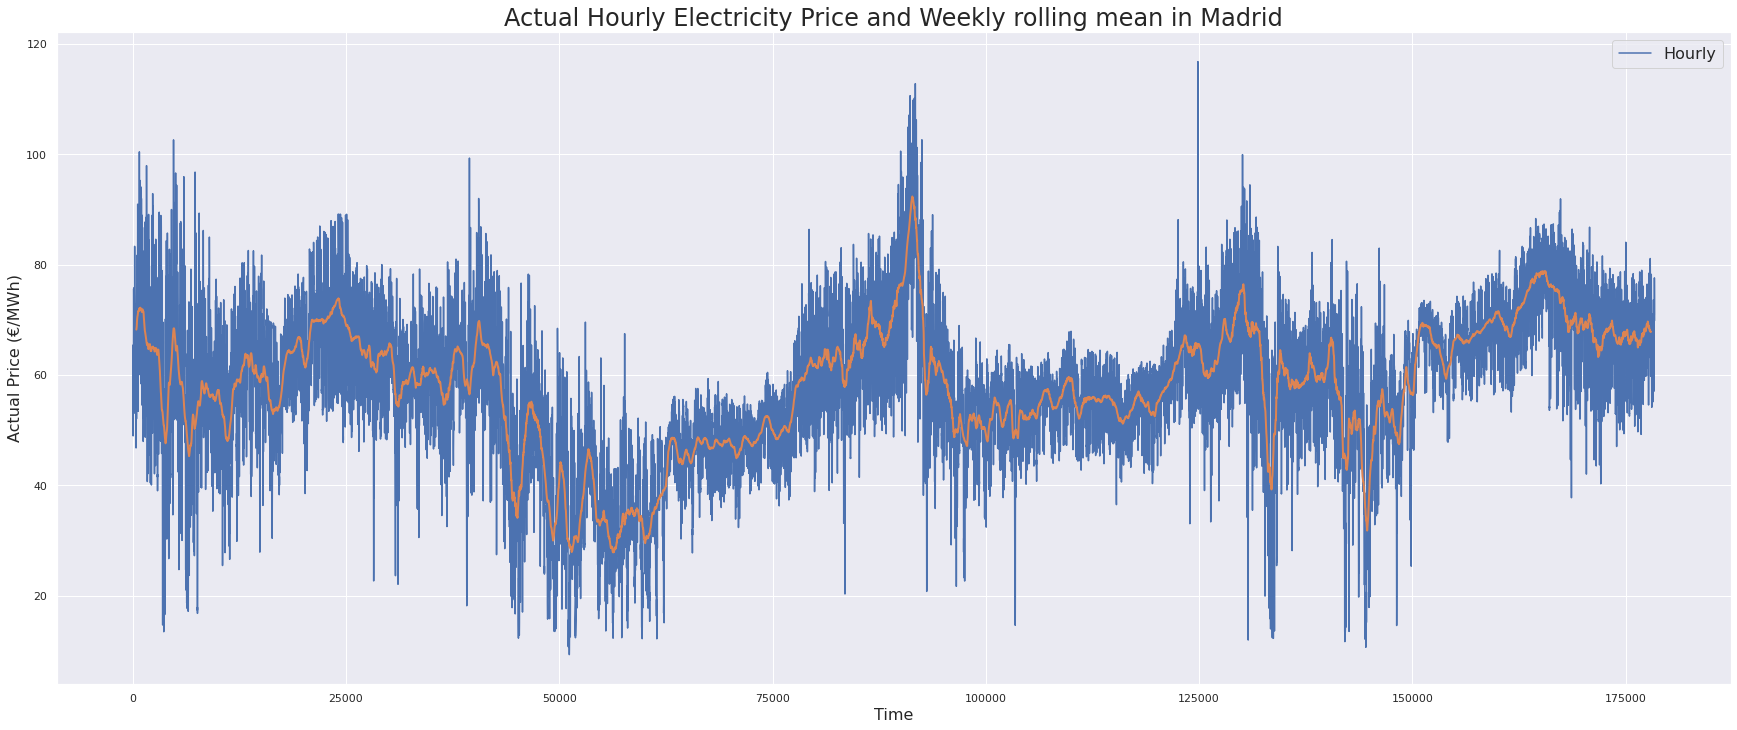

In [ ]:
rolling = Madrid_df['price_actual'].rolling(24*7, center=True).mean()
ax = plot_series(Madrid_df, 'price_actual', label='Hourly', ylabel='Actual Price (€/MWh)',
                 title='Actual Hourly Electricity Price and Weekly rolling mean in Madrid')
ax.plot(rolling, linestyle='-', linewidth=2, label='Weekly rolling mean')
plt.show()

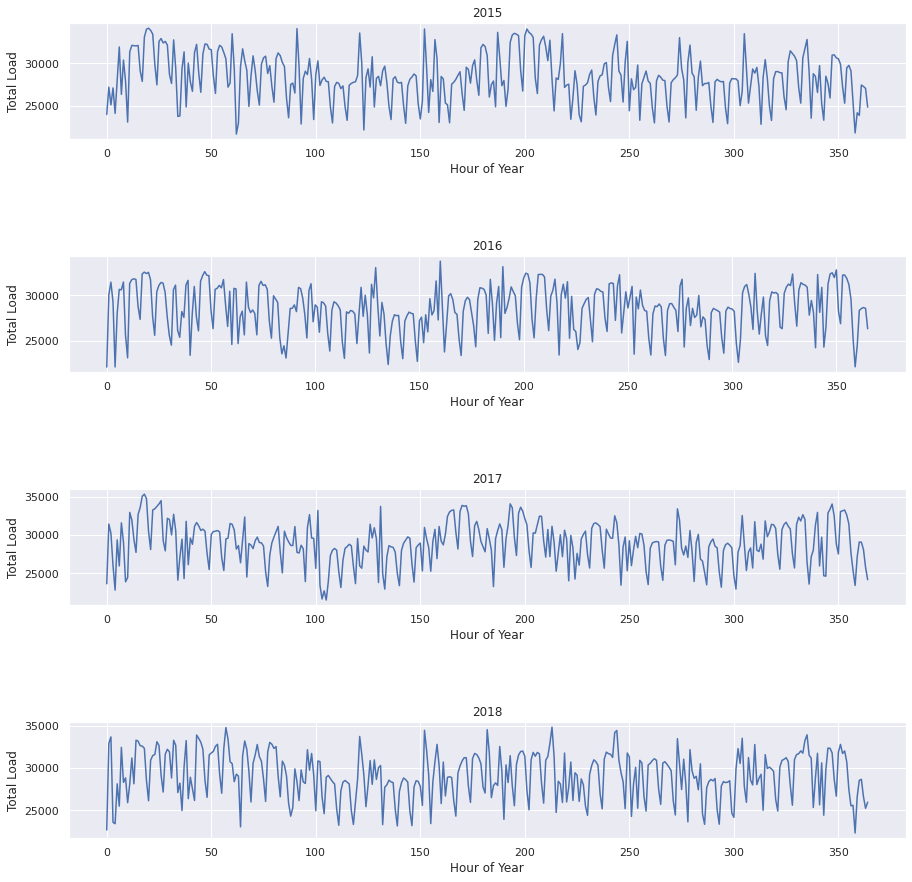

In [ ]:
M_df = Madrid_df.resample('D', on='time').mean()
M_df = M_df['2015':'2018']
groups = M_df['total_load_actual'].groupby(pd.Grouper(freq='A'))

#set figure and axis
fig, axs = plt.subplots(len(groups), 1, figsize=(15,15))


for ax, (name, group) in zip(axs, groups):

    #plot the data
    ax.plot(pd.Series(group.values))

    ax.set_xlabel('Hour of Year')
    ax.set_ylabel('Total Load')
    ax.set_title(name.year)
    plt.subplots_adjust(hspace=1)

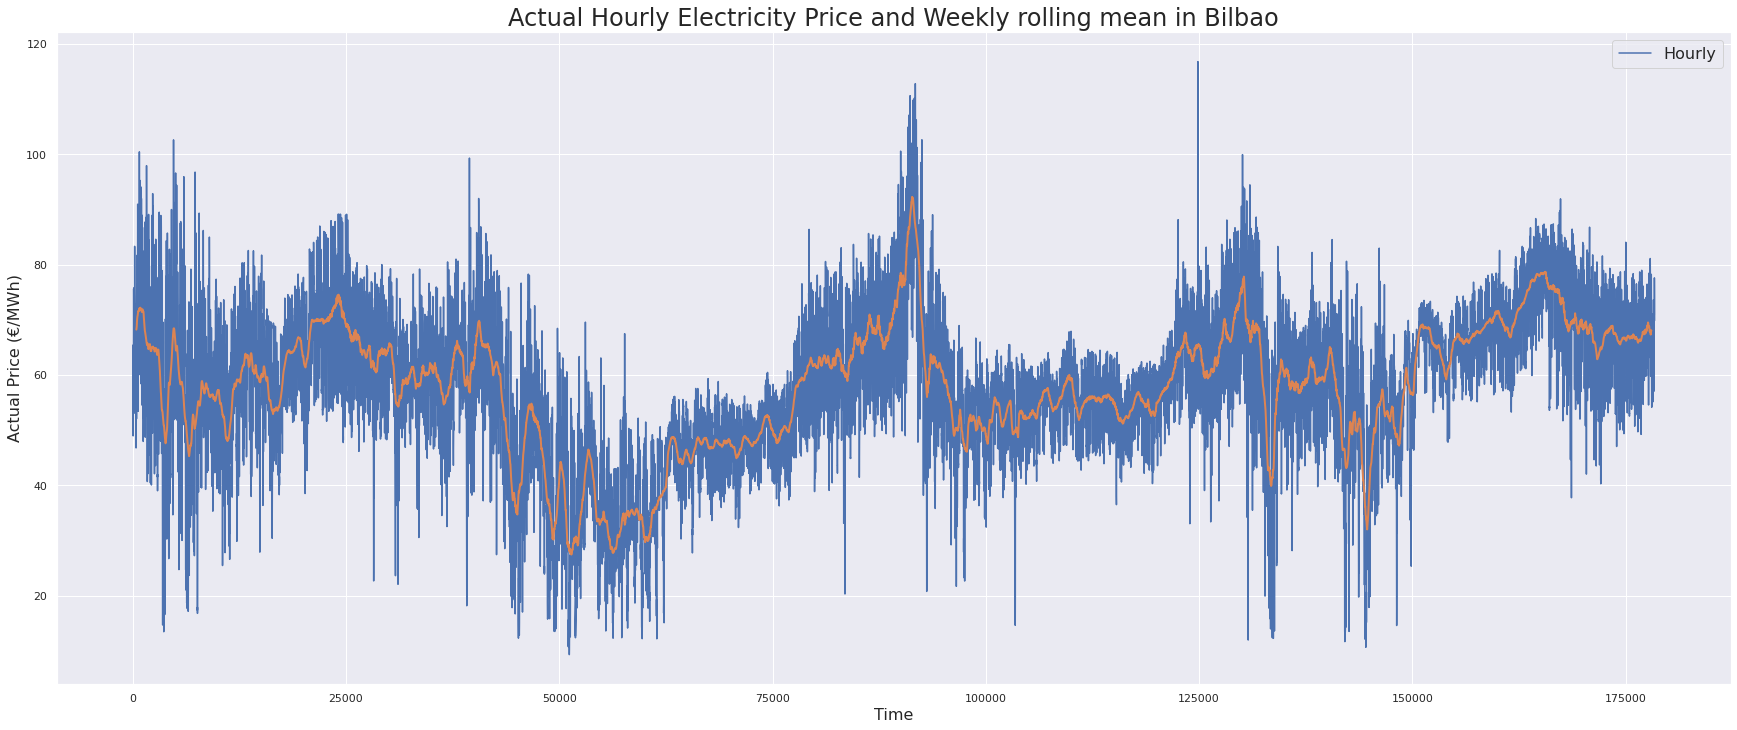

In [ ]:
rolling = Bilbao_df['price_actual'].rolling(24*7, center=True).mean()
ax = plot_series(Bilbao_df, 'price_actual', label='Hourly', ylabel='Actual Price (€/MWh)',
                 title='Actual Hourly Electricity Price and Weekly rolling mean in Bilbao')
ax.plot(rolling, linestyle='-', linewidth=2, label='Weekly rolling mean')
plt.show()

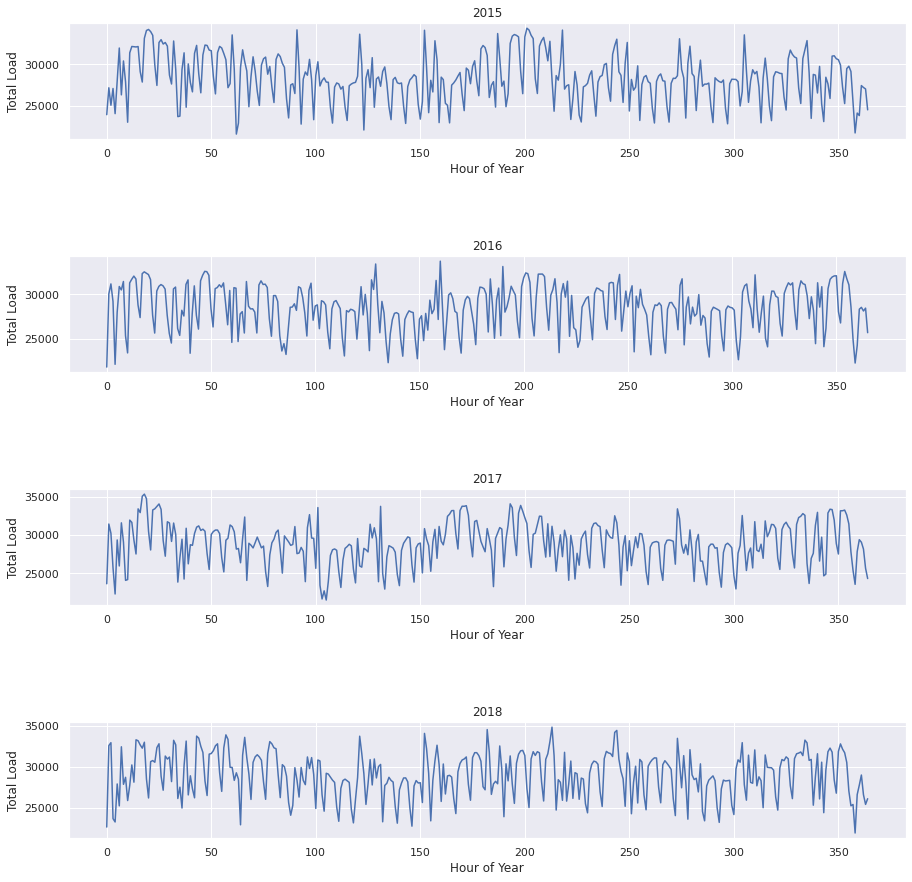

In [ ]:
Bi_df = Bilbao_df.resample('D', on='time').mean()
Bi_df = Bi_df['2015':'2018']
groups = Bi_df['total_load_actual'].groupby(pd.Grouper(freq='A'))

#set figure and axis
fig, axs = plt.subplots(len(groups), 1, figsize=(15,15))


for ax, (name, group) in zip(axs, groups):

    #plot the data
    ax.plot(pd.Series(group.values))

    ax.set_xlabel('Hour of Year')
    ax.set_ylabel('Total Load')
    ax.set_title(name.year)
    plt.subplots_adjust(hspace=1)

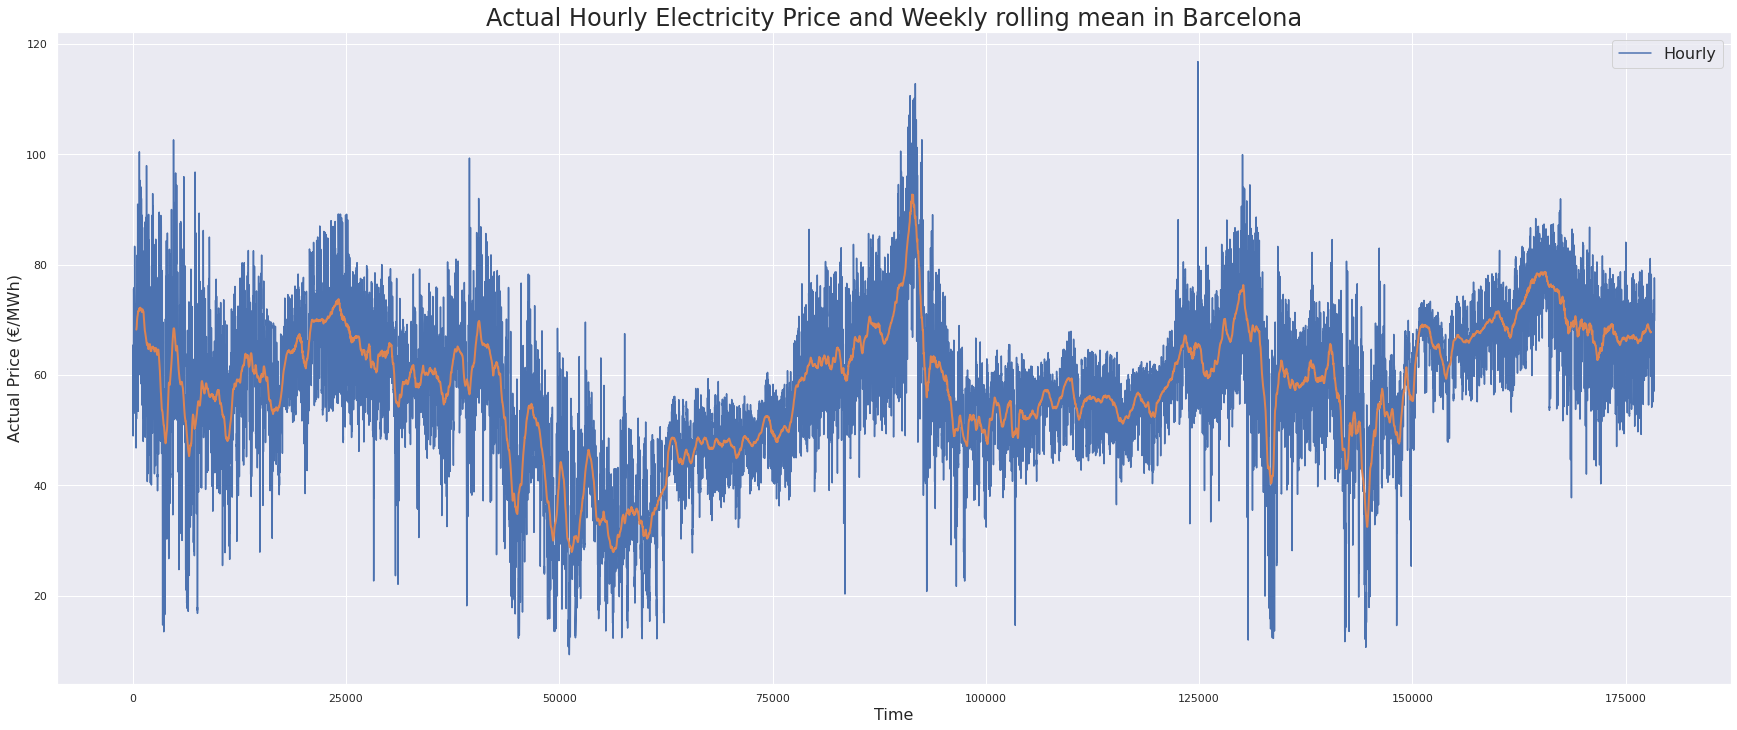

In [ ]:
rolling = Barcelona_df['price_actual'].rolling(24*7, center=True).mean()
ax = plot_series(Barcelona_df, 'price_actual', label='Hourly', ylabel='Actual Price (€/MWh)',
                 title='Actual Hourly Electricity Price and Weekly rolling mean in Barcelona')
ax.plot(rolling, linestyle='-', linewidth=2, label='Weekly rolling mean')
plt.show()

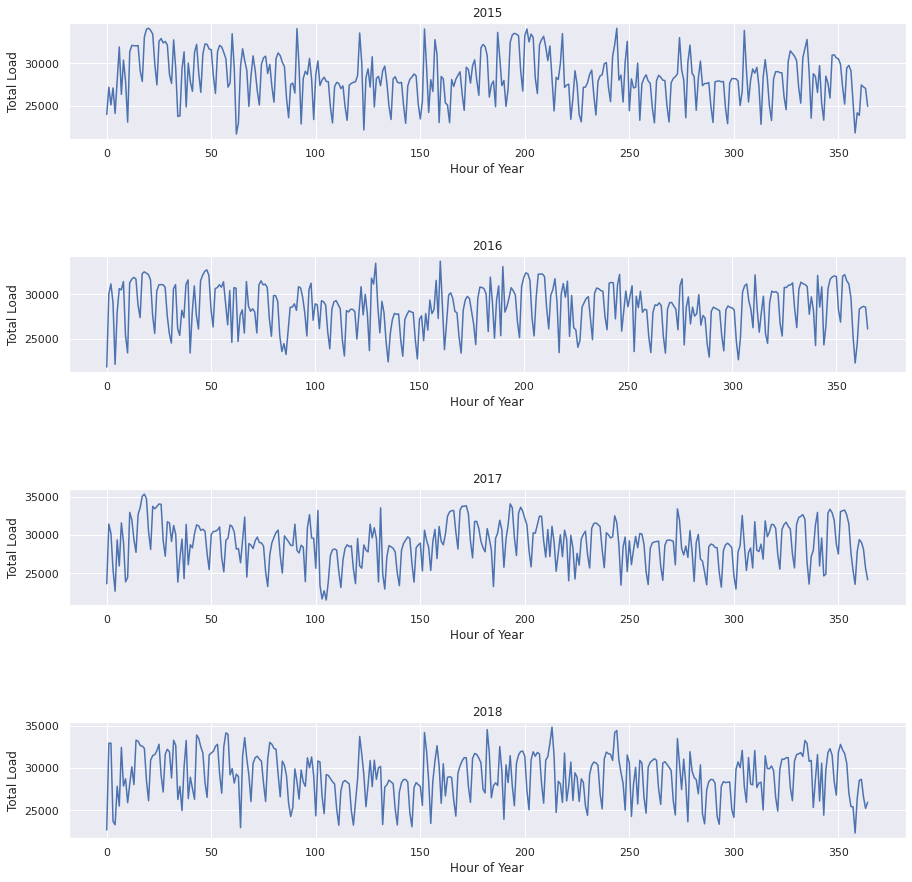

In [ ]:
Ba_df = Barcelona_df.resample('D', on='time').mean()
Ba_df = Ba_df['2015':'2018']
groups = Ba_df['total_load_actual'].groupby(pd.Grouper(freq='A'))

#set figure and axis
fig, axs = plt.subplots(len(groups), 1, figsize=(15,15))


for ax, (name, group) in zip(axs, groups):

    #plot the data
    ax.plot(pd.Series(group.values))

    ax.set_xlabel('Hour of Year')
    ax.set_ylabel('Total Load')
    ax.set_title(name.year)
    plt.subplots_adjust(hspace=1)

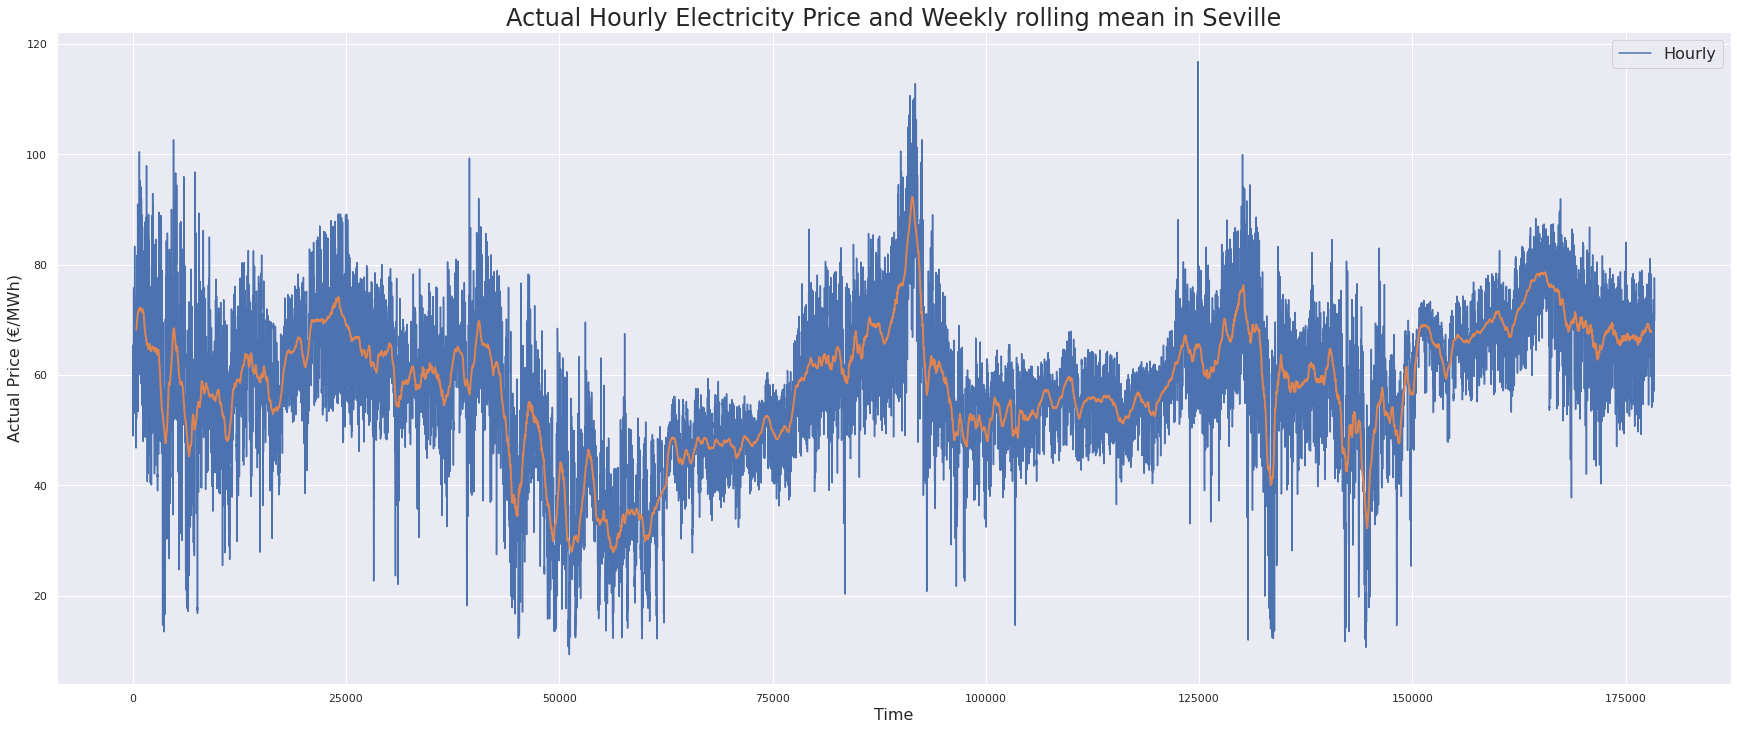

In [ ]:
rolling = Seville_df['price_actual'].rolling(24*7, center=True).mean()
ax = plot_series(Seville_df, 'price_actual', label='Hourly', ylabel='Actual Price (€/MWh)',
                 title='Actual Hourly Electricity Price and Weekly rolling mean in Seville')
ax.plot(rolling, linestyle='-', linewidth=2, label='Weekly rolling mean')
plt.show()

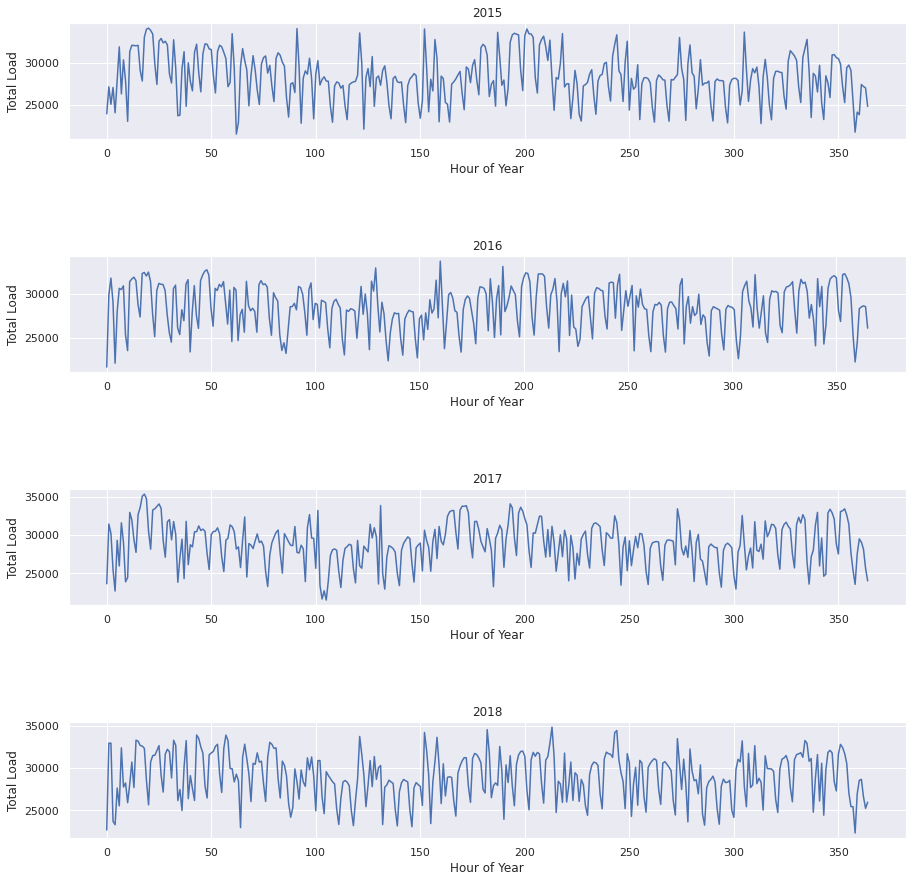

In [ ]:
S_df = Seville_df.resample('D', on='time').mean()
S_df = S_df['2015':'2018']
groups = S_df['total_load_actual'].groupby(pd.Grouper(freq='A'))

#set figure and axis
fig, axs = plt.subplots(len(groups), 1, figsize=(15,15))


for ax, (name, group) in zip(axs, groups):

    #plot the data
    ax.plot(pd.Series(group.values))

    ax.set_xlabel('Hour of Year')
    ax.set_ylabel('Total Load')
    ax.set_title(name.year)
    plt.subplots_adjust(hspace=1)

In [ ]:
Valencia_df
Madrid_df
Bilbao_df
Barcelona_df
Seville_df

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,generation wind,temp_C
4,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,75,1.0,21,0.0,0.0,0.0,0,800,6378.0,0.2
9,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,75,1.0,21,0.0,0.0,0.0,0,800,5890.0,0.2
14,2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,71,3.0,27,0.0,0.0,0.0,0,800,5461.0,0.9
19,2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,71,3.0,27,0.0,0.0,0.0,0,800,5238.0,0.9
24,2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,71,3.0,27,0.0,0.0,0.0,0,800,4935.0,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178375,2018-12-31 18:00:00+00:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,...,54,3.0,30,0.0,0.0,0.0,0,800,3113.0,14.6
178380,2018-12-31 19:00:00+00:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,...,62,3.0,30,0.0,0.0,0.0,0,800,3288.0,12.6
178385,2018-12-31 20:00:00+00:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,...,58,4.0,50,0.0,0.0,0.0,0,800,3503.0,12.0
178390,2018-12-31 21:00:00+00:00,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,...,57,4.0,60,0.0,0.0,0.0,0,800,3586.0,11.0


In [ ]:
Valencia_load_test = Valencia_df['total_load_actual']
Valencia_price_test = Valencia_df['price_actual']
Valencia_load_given = Valencia_df['total load forecast']
Valencia_price_given = Valencia_df['price_day_ahead']
Valencia_train = Valencia_df.drop(columns=['temp_C', 'total load forecast','total_load_actual','price_day_ahead','price_actual','city_name'])

Madrid_load_test = Madrid_df['total_load_actual']
Madrid_price_test = Madrid_df['price_actual']
Madrid_load_given = Madrid_df['total load forecast']
Madrid_price_given = Madrid_df['price_day_ahead']
Madrid_train = Madrid_df.drop(columns=['temp_C', 'total load forecast','total_load_actual','price_day_ahead','price_actual','city_name'])

Bilbao_load_test = Bilbao_df['total_load_actual']
Bilbao_price_test = Bilbao_df['price_actual']
Bilbao_load_given = Bilbao_df['total load forecast']
Bilbao_price_given = Bilbao_df['price_day_ahead']
Bilbao_train = Bilbao_df.drop(columns=['temp_C', 'total load forecast','total_load_actual','price_day_ahead','price_actual','city_name'])

Barcelona_load_test = Barcelona_df['total_load_actual']
Barcelona_price_test = Barcelona_df['price_actual']
Barcelona_load_given = Barcelona_df['total load forecast']
Barcelona_price_given = Barcelona_df['price_day_ahead']
Barcelona_train = Barcelona_df.drop(columns=['temp_C', 'total load forecast','total_load_actual','price_day_ahead','price_actual','city_name'])

Seville_load_test = Seville_df['total_load_actual']
Seville_price_test = Seville_df['price_actual']
Seville_load_given = Seville_df['total load forecast']
Seville_price_given = Seville_df['price_day_ahead']
Seville_train = Seville_df.drop(columns=['temp_C', 'total load forecast','total_load_actual','price_day_ahead','price_actual','city_name'])

In [ ]:
# total load forecast -> given
#total_load_actual -> our
#price_day_ahead -> given
#price_actual -> our

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
V_feature_train, V_feature_test, V_target_load_train, V_target_load_test = train_test_split(Valencia_train, Valencia_load_test, test_size = 0.2, random_state = 1)
V_feature_train, V_feature_test, V_target_price_train, V_target_price_test = train_test_split(Valencia_train, Valencia_price_test, test_size = 0.2, random_state = 1)

M_feature_train, M_feature_test, M_target_load_train, M_target_load_test = train_test_split(Madrid_train, Madrid_load_test, test_size = 0.2, random_state = 1)
M_feature_train, M_feature_test, M_target_price_train, M_target_price_test = train_test_split(Madrid_train, Madrid_price_test, test_size = 0.2, random_state = 1)

Bi_feature_train, Bi_feature_test, Bi_target_load_train, Bi_target_load_test = train_test_split(Bilbao_train, Bilbao_load_test, test_size = 0.2, random_state = 1)
Bi_feature_train, Bi_feature_test, Bi_target_price_train, Bi_target_price_test = train_test_split(Bilbao_train, Bilbao_price_test, test_size = 0.2, random_state = 1)

Ba_feature_train, Ba_feature_test, Ba_target_load_train, Ba_target_load_test = train_test_split(Barcelona_train, Barcelona_load_test, test_size = 0.2, random_state = 1)
Ba_feature_train, Ba_feature_test, Ba_target_price_train, Ba_target_price_test = train_test_split(Barcelona_train, Barcelona_price_test, test_size = 0.2, random_state = 1)

S_feature_train, S_feature_test, S_target_load_train, S_target_load_test = train_test_split(Seville_train, Seville_load_test, test_size = 0.2, random_state = 1)
S_feature_train, S_feature_test, S_target_price_train, S_target_price_test = train_test_split(Seville_train, Seville_price_test, test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
V_feature_train_notime = V_feature_train.drop(columns=['time'])
M_feature_train_notime = M_feature_train.drop(columns=['time'])
S_feature_train_notime = S_feature_train.drop(columns=['time'])
Ba_feature_train_notime = Ba_feature_train.drop(columns=['time'])
BI_feature_train_notime = Bi_feature_train.drop(columns=['time'])

In [ ]:
M_feature_test_notime = M_feature_test.drop(columns=['time'])
Ba_feature_test_notime = Ba_feature_test.drop(columns=['time'])
Bi_feature_test_notime = Bi_feature_test.drop(columns=['time'])
S_feature_test_notime = S_feature_test.drop(columns=['time'])

In [ ]:

V_feature_test_notime = V_feature_test.drop(columns=['time'])






In [ ]:
mlrV_load = LinearRegression()
mlrV_load.fit(V_feature_train_notime, V_target_load_train)
mlrV_price = LinearRegression()
mlrV_price.fit(V_feature_train_notime, V_target_price_train)

mlrM_load = LinearRegression()
mlrM_load.fit(M_feature_train_notime, M_target_load_train)
mlrM_price = LinearRegression()
mlrM_price.fit(M_feature_train_notime, M_target_price_train)

mlrBi_load = LinearRegression()
mlrBi_load.fit(BI_feature_train_notime, Bi_target_load_train)
mlrBi_price = LinearRegression()
mlrBi_price.fit(BI_feature_train_notime, Bi_target_price_train)

mlrBa_load = LinearRegression()
mlrBa_load.fit(Ba_feature_train_notime, Ba_target_load_train)
mlrBa_price = LinearRegression()
mlrBa_price.fit(Ba_feature_train_notime, Ba_target_price_train)

mlrS_load = LinearRegression()
mlrS_load.fit(S_feature_train_notime, S_target_load_train)
mlrS_price = LinearRegression()
mlrS_price.fit(S_feature_train_notime, S_target_price_train)


LinearRegression()

In [ ]:
print("Intercept: ", mlrV_load.intercept_)
print("Coefficients:")
list(zip(V_feature_train, mlrV_load.coef_))

Intercept:  -18898.035459253715
Coefficients:


[('time', 1.824975405037647),
 ('generation biomass', 0.9072956357896204),
 ('generation fossil brown coal/lignite', 0.7662057069063636),
 ('generation fossil gas', 0.7017037238243607),
 ('generation fossil hard coal', 7.3808034888920435),
 ('generation fossil oil', -1.335407465676324),
 ('generation hydro pumped storage consumption', 0.8192016296636481),
 ('generation hydro run-of-river and poundage', 1.0376299584997548),
 ('generation hydro water reservoir', 0.7662444645472544),
 ('generation nuclear', 1.7486630677965878),
 ('generation other', 27.006666478338378),
 ('generation other renewable', 0.21617628991760632),
 ('generation solar', 5.401608718543416),
 ('generation waste', 0.7044517928000069),
 ('forecast solar day ahead', 0.11432880474786015),
 ('forecast wind onshore day ahead', -38.047986712318426),
 ('temp', 30.88197792596278),
 ('temp_min', 15.997898939029024),
 ('temp_max', 16.868181062528816),
 ('pressure', 2.3267643223420698),
 ('humidity', 1.9940064839886686),
 ('win

In [ ]:
print("Intercept: ", mlrV_price.intercept_)
print("Coefficients:")
list(zip(V_feature_train, mlrV_price.coef_))

Intercept:  -194.9493036573499
Coefficients:


[('time', 0.028256099931079488),
 ('generation biomass', -0.0006292474279855563),
 ('generation fossil brown coal/lignite', 0.0012570841100049978),
 ('generation fossil gas', 0.0023490617186080706),
 ('generation fossil hard coal', -0.01607122496033149),
 ('generation fossil oil', -0.0030950977357826555),
 ('generation hydro pumped storage consumption', 0.001471853659029186),
 ('generation hydro run-of-river and poundage', 0.0008234217808815829),
 ('generation hydro water reservoir', 0.00023636139692731443),
 ('generation nuclear', 0.038650181882374686),
 ('generation other', 0.25405204045810037),
 ('generation other renewable', 0.001280992562485465),
 ('generation solar', -0.01694988151426425),
 ('generation waste', -0.0003209487826957616),
 ('forecast solar day ahead', 0.00041056437658750877),
 ('forecast wind onshore day ahead', 0.4127252759508025),
 ('temp', 1.1949641684727728),
 ('temp_min', -1.3558656519165813),
 ('temp_max', 0.11838438876911385),
 ('pressure', 0.128205650352603)

In [ ]:
V_price_pred_mlr= mlrV_price.predict(V_feature_test_notime)
V_load_pred_mlr= mlrV_load.predict(V_feature_test_notime)





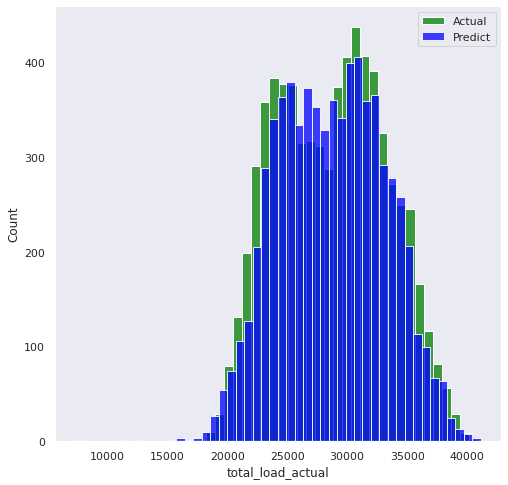

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.histplot(V_target_load_test, label='Actual', ax=ax, color='green')
sns.histplot(V_load_pred_mlr, label='Predict', ax=ax, color='blue')
ax.legend()
ax.grid()

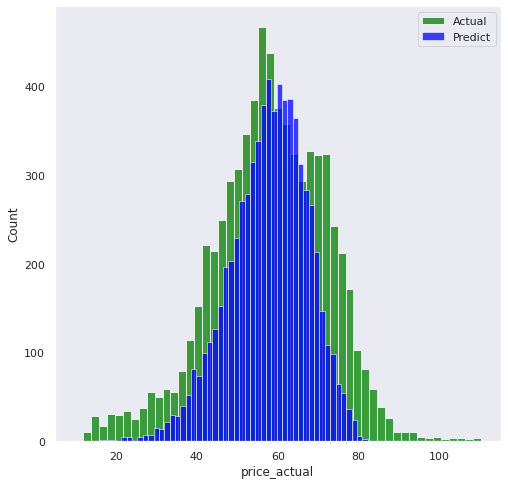

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.histplot(V_target_price_test, label='Actual', ax=ax, color='green')
sns.histplot(V_price_pred_mlr, label='Predict', ax=ax, color='blue')
ax.legend()
ax.grid()

In [ ]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(V_target_price_test, V_price_pred_mlr)
meanSqErr = metrics.mean_squared_error(V_target_price_test, V_price_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(V_target_price_test, V_price_pred_mlr))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 8.230964392297272
Mean Square Error: 115.1089008793654
Root Mean Square Error: 10.72888162295425


In [ ]:
meanAbErrl = metrics.mean_absolute_error(V_target_load_test, V_load_pred_mlr)
meanSqErrl = metrics.mean_squared_error(V_target_load_test, V_load_pred_mlr)
rootMeanSqErrl = np.sqrt(metrics.mean_squared_error(V_target_load_test, V_load_pred_mlr))
print('Mean Absolute Error:', meanAbErrl)
print('Mean Square Error:', meanSqErrl)
print('Root Mean Square Error:', rootMeanSqErrl)

Mean Absolute Error: 1052.902664716613
Mean Square Error: 1953354.8347548505
Root Mean Square Error: 1397.6247117001226


In [ ]:
# V M Bi Ba S

In [ ]:
print("Intercept: ", mlrM_load.intercept_)
print("Coefficients:")
list(zip(M_feature_train, mlrM_load.coef_))

Intercept:  -7665.354517779961
Coefficients:


[('time', 1.9303305092732108),
 ('generation biomass', 1.0188346812193265),
 ('generation fossil brown coal/lignite', 0.7626195271391043),
 ('generation fossil gas', 0.6963119204754494),
 ('generation fossil hard coal', 7.3212434436616345),
 ('generation fossil oil', -1.3472397010087491),
 ('generation hydro pumped storage consumption', 0.8355927384239982),
 ('generation hydro run-of-river and poundage', 1.0237063488378018),
 ('generation hydro water reservoir', 0.7622237450543269),
 ('generation nuclear', 1.5984300786377046),
 ('generation other', 25.37956627131593),
 ('generation other renewable', 0.1898457036322569),
 ('generation solar', 5.038319534780343),
 ('generation waste', 0.7221326627829598),
 ('forecast solar day ahead', 0.16804641775955487),
 ('forecast wind onshore day ahead', -47.690465275811555),
 ('temp', 13.869055666067803),
 ('temp_min', 38.52572305556877),
 ('temp_max', 7.9733411821491895),
 ('pressure', -0.2929945775795066),
 ('humidity', -18.900551238780004),
 ('w

In [ ]:
print("Intercept: ", mlrM_price.intercept_)
print("Coefficients:")
list(zip(M_feature_train, mlrM_price.coef_))

Intercept:  11.894260276844655
Coefficients:


[('time', 0.024181654207563085),
 ('generation biomass', 0.0001644581464978233),
 ('generation fossil brown coal/lignite', 0.0012640790571589902),
 ('generation fossil gas', 0.002157992523730713),
 ('generation fossil hard coal', -0.01175548475337805),
 ('generation fossil oil', -0.0033012829296573992),
 ('generation hydro pumped storage consumption', 0.001844192120781705),
 ('generation hydro run-of-river and poundage', 0.00047061940410166676),
 ('generation hydro water reservoir', 0.00015693808344528318),
 ('generation nuclear', 0.03508246940910179),
 ('generation other', 0.299052465246851),
 ('generation other renewable', 0.0008982637192364982),
 ('generation solar', -0.009932384914090054),
 ('generation waste', -0.00031029787171190585),
 ('forecast solar day ahead', 0.000551217174972176),
 ('forecast wind onshore day ahead', 1.1964933842729557),
 ('temp', -0.653821884591373),
 ('temp_min', -0.46563125844295256),
 ('temp_max', -0.02584217512176704),
 ('pressure', 0.03278142157422632

In [ ]:
M_price_pred_mlr= mlrM_price.predict(M_feature_test_notime)
M_load_pred_mlr= mlrM_load.predict(M_feature_test_notime)

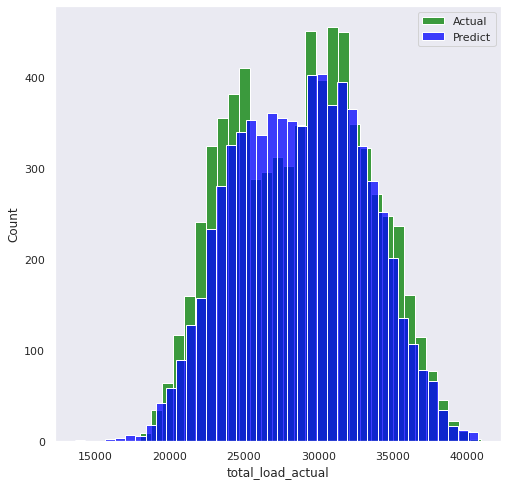

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.histplot(M_target_load_test, label='Actual', ax=ax, color='green')
sns.histplot(M_load_pred_mlr, label='Predict', ax=ax, color='blue')
ax.legend()
ax.grid()

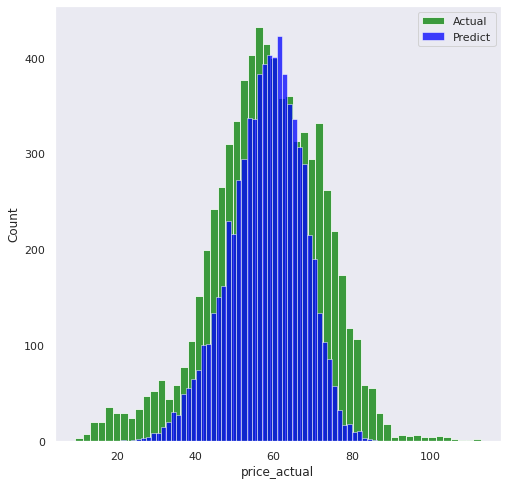

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.histplot(M_target_price_test, label='Actual', ax=ax, color='green')
sns.histplot(M_price_pred_mlr, label='Predict', ax=ax, color='blue')
ax.legend()
ax.grid()

In [ ]:
meanAbErr = metrics.mean_absolute_error(M_target_price_test, M_price_pred_mlr)
meanSqErr = metrics.mean_squared_error(M_target_price_test, M_price_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(M_target_price_test, M_price_pred_mlr))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 8.310743562696842
Mean Square Error: 117.06963239502228
Root Mean Square Error: 10.819872106222988


In [ ]:

meanAbErrl = metrics.mean_absolute_error(M_target_load_test, M_load_pred_mlr)
meanSqErrl = metrics.mean_squared_error(M_target_load_test, M_load_pred_mlr)
rootMeanSqErrl = np.sqrt(metrics.mean_squared_error(M_target_load_test, M_load_pred_mlr))
print('Mean Absolute Error:', meanAbErrl)
print('Mean Square Error:', meanSqErrl)
print('Root Mean Square Error:', rootMeanSqErrl)

Mean Absolute Error: 1067.398643815028
Mean Square Error: 1833561.0212909752
Root Mean Square Error: 1354.0904775128488


In [ ]:
print("Intercept: ", mlrBa_load.intercept_)
print("Coefficients:")
list(zip(Ba_feature_train, mlrBa_load.coef_))

Intercept:  -15794.508683589855
Coefficients:


[('time', 1.7984637378468995),
 ('generation biomass', 0.9189573418759472),
 ('generation fossil brown coal/lignite', 0.7739446136778058),
 ('generation fossil gas', 0.6910802887460649),
 ('generation fossil hard coal', 7.404484420291515),
 ('generation fossil oil', -1.3383670104402208),
 ('generation hydro pumped storage consumption', 0.8305560984441042),
 ('generation hydro run-of-river and poundage', 1.0232366421894712),
 ('generation hydro water reservoir', 0.7769761822997941),
 ('generation nuclear', 1.306669174279282),
 ('generation other', 26.726362261630058),
 ('generation other renewable', 0.12983199286945446),
 ('generation solar', 5.40653547990435),
 ('generation waste', 0.7644260086478123),
 ('forecast solar day ahead', 0.14851970990581595),
 ('forecast wind onshore day ahead', -49.028429051429974),
 ('temp', 33.5422490907212),
 ('temp_min', 26.730986069559435),
 ('temp_max', 13.648631655224372),
 ('pressure', -2.5956401201292656),
 ('humidity', 13.34686505369809),
 ('wind_

In [ ]:
print("Intercept: ", mlrBa_price.intercept_)
print("Coefficients:")
list(zip(Ba_feature_train, mlrBa_price.coef_))

Intercept:  -448.95003699297274
Coefficients:


[('time', 0.03057483939529687),
 ('generation biomass', -0.0005822524438395003),
 ('generation fossil brown coal/lignite', 0.001404730376090587),
 ('generation fossil gas', 0.002244976054453624),
 ('generation fossil hard coal', -0.01534952766804469),
 ('generation fossil oil', -0.002878849295928543),
 ('generation hydro pumped storage consumption', 0.002780287959480518),
 ('generation hydro run-of-river and poundage', 0.000535429722261983),
 ('generation hydro water reservoir', 2.8887106540253785e-05),
 ('generation nuclear', 0.04062669785113812),
 ('generation other', 0.3126739585522758),
 ('generation other renewable', -0.00028526739783860073),
 ('generation solar', -0.008147526970560889),
 ('generation waste', 0.0008666958644143154),
 ('forecast solar day ahead', 0.0007355943381520448),
 ('forecast wind onshore day ahead', 0.2895573395667164),
 ('temp', -0.1081828602650385),
 ('temp_min', -0.07675877768447446),
 ('temp_max', 0.4124531079341597),
 ('pressure', 0.030562431086032717),

In [ ]:
Ba_price_pred_mlr= mlrBa_price.predict(Ba_feature_test_notime)
Ba_load_pred_mlr= mlrBa_load.predict(Ba_feature_test_notime)

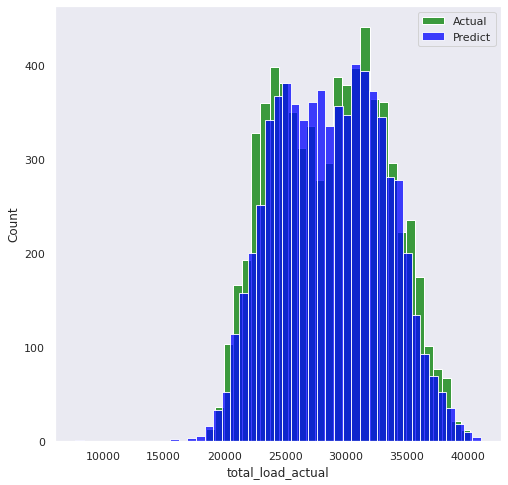

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.histplot(Ba_target_load_test, label='Actual', ax=ax, color='green')
sns.histplot(Ba_load_pred_mlr, label='Predict', ax=ax, color='blue')
ax.legend()
ax.grid()

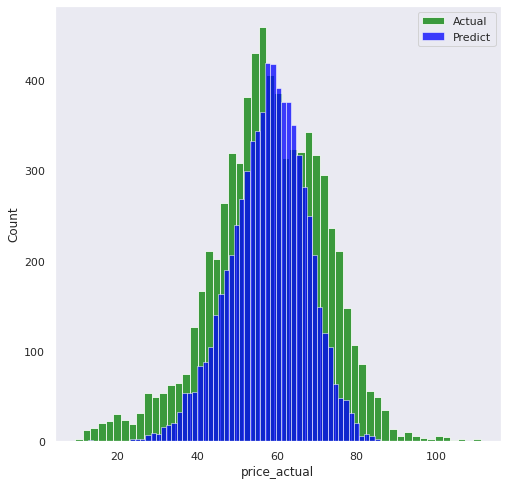

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.histplot(Ba_target_price_test, label='Actual', ax=ax, color='green')
sns.histplot(Ba_price_pred_mlr, label='Predict', ax=ax, color='blue')
ax.legend()
ax.grid()

In [ ]:
meanAbErr = metrics.mean_absolute_error(Ba_target_price_test, Ba_price_pred_mlr)
meanSqErr = metrics.mean_squared_error(Ba_target_price_test, Ba_price_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(Ba_target_price_test, Ba_price_pred_mlr))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 8.186768363649612
Mean Square Error: 111.54297862156974
Root Mean Square Error: 10.561390941612272


In [ ]:

meanAbErrl = metrics.mean_absolute_error(Ba_target_load_test, Ba_load_pred_mlr)
meanSqErrl = metrics.mean_squared_error(Ba_target_load_test, Ba_load_pred_mlr)
rootMeanSqErrl = np.sqrt(metrics.mean_squared_error(Ba_target_load_test, Ba_load_pred_mlr))
print('Mean Absolute Error:', meanAbErrl)
print('Mean Square Error:', meanSqErrl)
print('Root Mean Square Error:', rootMeanSqErrl)

Mean Absolute Error: 1053.8629689513323
Mean Square Error: 1868881.1294322524
Root Mean Square Error: 1367.0702723094569


In [ ]:
print("Intercept: ", mlrBi_load.intercept_)
print("Coefficients:")
list(zip(Bi_feature_train, mlrBi_load.coef_))

Intercept:  -7933.322846177267
Coefficients:


[('time', 1.6474434754173328),
 ('generation biomass', 0.9079996067360601),
 ('generation fossil brown coal/lignite', 0.77087723797032),
 ('generation fossil gas', 0.6951284046868617),
 ('generation fossil hard coal', 7.5111744398834634),
 ('generation fossil oil', -1.340796241584494),
 ('generation hydro pumped storage consumption', 0.8570374253812696),
 ('generation hydro run-of-river and poundage', 1.0183867533463635),
 ('generation hydro water reservoir', 0.7771692918471154),
 ('generation nuclear', 2.637818128077632),
 ('generation other', 26.0944999382093),
 ('generation other renewable', 0.15492166873645075),
 ('generation solar', 5.171449925398985),
 ('generation waste', 0.7429177367282157),
 ('forecast solar day ahead', 0.2030246034326004),
 ('forecast wind onshore day ahead', 48.4003266859989),
 ('temp', -43.202182499285094),
 ('temp_min', 7.138199269600862),
 ('temp_max', 5.574074310005712),
 ('pressure', -1.8083670671114924),
 ('humidity', 13.988481535146823),
 ('wind_speed

In [ ]:
print("Intercept: ", mlrBi_price.intercept_)
print("Coefficients:")
list(zip(Bi_feature_train, mlrBi_price.coef_))

Intercept:  -264.9875160927302
Coefficients:


[('time', 0.02421273006812835),
 ('generation biomass', 0.0001700130610189402),
 ('generation fossil brown coal/lignite', 0.0012933705866412096),
 ('generation fossil gas', 0.0023086580338388713),
 ('generation fossil hard coal', -0.017115213066513018),
 ('generation fossil oil', -0.0030332053922834017),
 ('generation hydro pumped storage consumption', 0.0012964612572199277),
 ('generation hydro run-of-river and poundage', 0.0007505640148763152),
 ('generation hydro water reservoir', 0.00023856889222044912),
 ('generation nuclear', 0.036744656780580316),
 ('generation other', 0.30323502540897634),
 ('generation other renewable', -0.00013286647413291697),
 ('generation solar', -0.009887163355384592),
 ('generation waste', 0.0007955293760423441),
 ('forecast solar day ahead', 0.0004668837186271891),
 ('forecast wind onshore day ahead', -3.565411079389566),
 ('temp', 1.9664285715314622),
 ('temp_min', 1.7531777643809239),
 ('temp_max', 0.21736222059556556),
 ('pressure', 0.088670195103755

In [ ]:
Bi_price_pred_mlr= mlrBi_price.predict(Bi_feature_test_notime)
Bi_load_pred_mlr= mlrBi_load.predict(Bi_feature_test_notime)

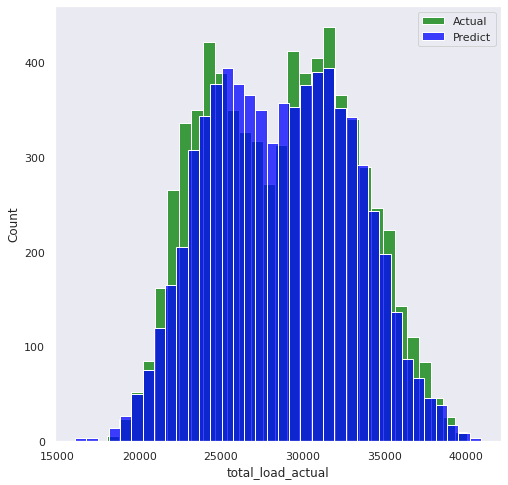

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.histplot(Bi_target_load_test, label='Actual', ax=ax, color='green')
sns.histplot(Bi_load_pred_mlr, label='Predict', ax=ax, color='blue')
ax.legend()
ax.grid()

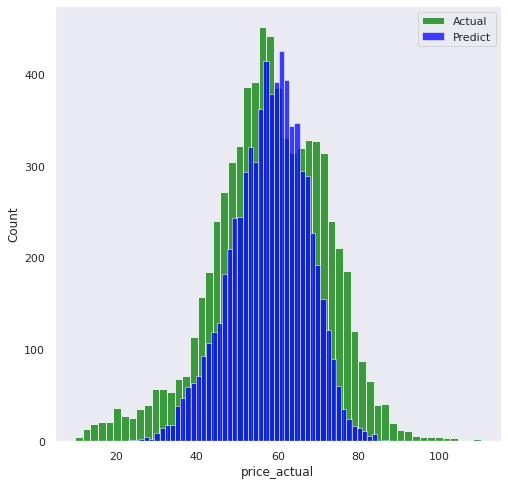

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.histplot(Bi_target_price_test, label='Actual', ax=ax, color='green')
sns.histplot(Bi_price_pred_mlr, label='Predict', ax=ax, color='blue')
ax.legend()
ax.grid()

In [ ]:
meanAbErr = metrics.mean_absolute_error(Bi_target_price_test, Bi_price_pred_mlr)
meanSqErr = metrics.mean_squared_error(Bi_target_price_test, Bi_price_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(Bi_target_price_test, Bi_price_pred_mlr))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 8.186147227315615
Mean Square Error: 111.90468597854891
Root Mean Square Error: 10.57850112154595


In [ ]:

meanAbErrl = metrics.mean_absolute_error(Bi_target_load_test, Bi_load_pred_mlr)
meanSqErrl = metrics.mean_squared_error(Bi_target_load_test, Bi_load_pred_mlr)
rootMeanSqErrl = np.sqrt(metrics.mean_squared_error(Bi_target_load_test, Bi_load_pred_mlr))
print('Mean Absolute Error:', meanAbErrl)
print('Mean Square Error:', meanSqErrl)
print('Root Mean Square Error:', rootMeanSqErrl)

Mean Absolute Error: 1052.883956648994
Mean Square Error: 1760538.623695371
Root Mean Square Error: 1326.8529020563549


In [ ]:
print("Intercept: ", mlrS_price.intercept_)
print("Coefficients:")
list(zip(S_feature_train, mlrS_price.coef_))

Intercept:  -189.4458610086408
Coefficients:


[('time', 0.026896431515526537),
 ('generation biomass', 0.00018858841199097297),
 ('generation fossil brown coal/lignite', 0.0012976550547483387),
 ('generation fossil gas', 0.002138638254168848),
 ('generation fossil hard coal', -0.015239068825691489),
 ('generation fossil oil', -0.0032456073496385093),
 ('generation hydro pumped storage consumption', 0.0017022713609854737),
 ('generation hydro run-of-river and poundage', 0.0005452712275025811),
 ('generation hydro water reservoir', 4.090694559544252e-05),
 ('generation nuclear', 0.0428444775466713),
 ('generation other', 0.3064037095143871),
 ('generation other renewable', -0.00035059697817467104),
 ('generation solar', -0.009983196364704437),
 ('generation waste', 0.0006601986599199617),
 ('forecast solar day ahead', 0.0006045192034256605),
 ('forecast wind onshore day ahead', 1.0068885095830666),
 ('temp', -0.39126915569162246),
 ('temp_min', -0.5143678679141891),
 ('temp_max', 0.16348496420452893),
 ('pressure', 0.018818287047441

In [ ]:
print("Intercept: ", mlrS_load.intercept_)
print("Coefficients:")
list(zip(S_feature_train, mlrS_load.coef_))

Intercept:  -12708.654339301142
Coefficients:


[('time', 1.8160269180669004),
 ('generation biomass', 0.8721716122937437),
 ('generation fossil brown coal/lignite', 0.7801368680014107),
 ('generation fossil gas', 0.6887963545932493),
 ('generation fossil hard coal', 7.524274790465727),
 ('generation fossil oil', -1.3481578283632358),
 ('generation hydro pumped storage consumption', 0.8676414460133622),
 ('generation hydro run-of-river and poundage', 1.0076145292712182),
 ('generation hydro water reservoir', 0.7609457310240898),
 ('generation nuclear', 1.5612921728022495),
 ('generation other', 28.161328595990316),
 ('generation other renewable', 0.14293326514828536),
 ('generation solar', 5.596701355382088),
 ('generation waste', 0.755195733445089),
 ('forecast solar day ahead', 0.23103417249248848),
 ('forecast wind onshore day ahead', -48.061422709441885),
 ('temp', 16.570391689047764),
 ('temp_min', 41.093884714842574),
 ('temp_max', 11.17312945573103),
 ('pressure', -0.1200546876108164),
 ('humidity', 44.03741235770867),
 ('win

In [ ]:
S_price_pred_mlr= mlrS_price.predict(S_feature_test_notime)
S_load_pred_mlr= mlrS_load.predict(S_feature_test_notime)

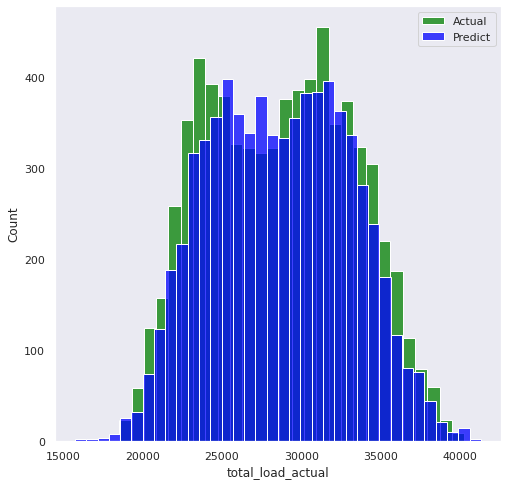

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.histplot(S_target_load_test, label='Actual', ax=ax, color='green')
sns.histplot(S_load_pred_mlr, label='Predict', ax=ax, color='blue')
ax.legend()
ax.grid()

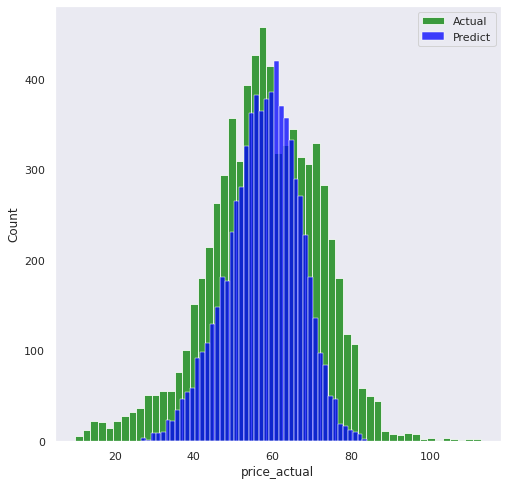

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.histplot(S_target_price_test, label='Actual', ax=ax, color='green')
sns.histplot(S_price_pred_mlr, label='Predict', ax=ax, color='blue')
ax.legend()
ax.grid()

In [ ]:
meanAbErr = metrics.mean_absolute_error(S_target_price_test, S_price_pred_mlr)
meanSqErr = metrics.mean_squared_error(S_target_price_test, S_price_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(S_target_price_test, S_price_pred_mlr))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 8.38514986264404
Mean Square Error: 117.95103877590937
Root Mean Square Error: 10.860526634372265


In [ ]:

meanAbErrl = metrics.mean_absolute_error(S_target_load_test, S_load_pred_mlr)
meanSqErrl = metrics.mean_squared_error(S_target_load_test, S_load_pred_mlr)
rootMeanSqErrl = np.sqrt(metrics.mean_squared_error(S_target_load_test, S_load_pred_mlr))
print('Mean Absolute Error:', meanAbErrl)
print('Mean Square Error:', meanSqErrl)
print('Root Mean Square Error:', rootMeanSqErrl)

Mean Absolute Error: 1054.1179983221664
Mean Square Error: 1791182.334841933
Root Mean Square Error: 1338.3506023617028
